# Week 11 - Exploratory Data Analysis (EDA), data manipulation (dplyr) and data visualization (ggplot2) with R.

* This week you will see `Exploratory Data Analysis (EDA)`, `data manipulation (dplyr)` and `data visualization (ggplot2)` with R.

# Exploratory Data Analysis (EDA)

* A collection of techniques for summarizing data sets with R.
* Search for answers by visualizing and transforming data sets.
* Use what you learn to refine your questions and/or generate new questions.
* We will mostly use `summary`, `head` and `table` functions and data visualization methods to make EDA.

## Example mtcars dataset

* First example dataset will be `mtcars` dataset.
* The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973--74 models).
* A data frame with 32 observations on 11 (numeric) variables.

    * `mpg`	 Miles/(US) gallon
    * `cyl`	 Number of cylinders
    * `disp`	 Displacement (cu.in.)
    * `hp`	 Gross horsepower
    * `drat`	 Rear axle ratio
    * `wt`	 Weight (1000 lbs)
    * `qsec`	 1/4 mile time
    * `vs`	 Engine (0 = V-shaped, 1 = straight)
    * `am`	 Transmission (0 = automatic, 1 = manual)
    * `gear`	 Number of forward gears
    * `carb`	 Number of carburetors
* `mtcars` is a data that comes with R installation so you do not need to import it. 

In [1]:
data(mtcars)

In [2]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [3]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

* You can use `apply` to iterate a function through all the columns. The code below gives a frequency table for all the columns.
* Here the `apply` function takes three arguments.
  * First is the dataset `mtcars`
  * Second is the direction of the function `1` is for the rows, `2` is for the column.
  * Third, the function to be applied `table`
* So `apply(mtcars,2,table)` means that, `table` function will be applied to all the columns `2` inside the `mtcars` dataset.
* According to dataset description (see `?mtcars`) first we need to categorize some variables.

In [4]:
apply(mtcars,2,table)

$mpg

10.4 13.3 14.3 14.7   15 15.2 15.5 15.8 16.4 17.3 17.8 18.1 18.7 19.2 19.7   21 
   2    1    1    1    1    2    1    1    1    1    1    1    1    2    1    2 
21.4 21.5 22.8 24.4   26 27.3 30.4 32.4 33.9 
   2    1    2    1    1    1    2    1    1 

$cyl

 4  6  8 
11  7 14 

$disp

 71.1  75.7  78.7    79  95.1   108 120.1 120.3   121 140.8   145 146.7   160 
    1     1     1     1     1     1     1     1     1     1     1     1     2 
167.6   225   258 275.8   301   304   318   350   351   360   400   440   460 
    2     1     1     3     1     1     1     1     1     2     1     1     1 
  472 
    1 

$hp

 52  62  65  66  91  93  95  97 105 109 110 113 123 150 175 180 205 215 230 245 
  1   1   1   2   1   1   1   1   1   1   3   1   2   2   3   3   1   1   1   2 
264 335 
  1   1 

$drat

2.76 2.93    3 3.07 3.08 3.15 3.21 3.23 3.54 3.62 3.69  3.7 3.73 3.77 3.85  3.9 
   2    1    1    3    2    2    1    1    1    1    1    1    1    1    1    2 
3.92 4.08 4.11 4.22

* The code below converts some of the suitable variables to categorical ones. 

In [5]:
mtcars$cyl <- as.factor(mtcars$cyl)
mtcars$vs <- factor(mtcars$vs, labels = c("V-shaped", "straight"))
mtcars$am <- factor(mtcars$am, labels = c("automatic", "manual"))
mtcars$carb <- as.factor(mtcars$carb)
mtcars$gear <- as.factor(mtcars$gear)

In [6]:
summary(mtcars)

      mpg        cyl         disp             hp             drat      
 Min.   :10.40   4:11   Min.   : 71.1   Min.   : 52.0   Min.   :2.760  
 1st Qu.:15.43   6: 7   1st Qu.:120.8   1st Qu.: 96.5   1st Qu.:3.080  
 Median :19.20   8:14   Median :196.3   Median :123.0   Median :3.695  
 Mean   :20.09          Mean   :230.7   Mean   :146.7   Mean   :3.597  
 3rd Qu.:22.80          3rd Qu.:326.0   3rd Qu.:180.0   3rd Qu.:3.920  
 Max.   :33.90          Max.   :472.0   Max.   :335.0   Max.   :4.930  
       wt             qsec              vs             am     gear   carb  
 Min.   :1.513   Min.   :14.50   V-shaped:18   automatic:19   3:15   1: 7  
 1st Qu.:2.581   1st Qu.:16.89   straight:14   manual   :13   4:12   2:10  
 Median :3.325   Median :17.71                                5: 5   3: 3  
 Mean   :3.217   Mean   :17.85                                       4:10  
 3rd Qu.:3.610   3rd Qu.:18.90                                       6: 1  
 Max.   :5.424   Max.   :22.90          

# Data Manipulation with dplyr{#dplyr}

## The Pipe Operator (%>%)

* The pipe operator originally invented in the `magrittr()` package which provides a more simple and readable approach to coding complex and nested structures.
* Later pipe operator is used as a cornerstone in `dplyr()` package.
* Consider the different ways of achieving the same result below.
* For this we will continue to look at the `mtcars()` data.

* Assume that, we want to sort
  * average fuel consumption of cars 
  * with number of carburators greater than 1 
  * by their number of cylinders
  * in a descending order.
* We can solve this with a few different approaches.
* Do not worry about the functions given below, just look at the readebility and complexity of the given code, you will learn each of these functions by the end of this week.

### Nested option

In [7]:
# install.packages('dplyr') # if you didn't do that earlier
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [8]:
arrange(
  summarize(
    group_by(
      filter(mtcars, as.numeric(carb) > 1),
      cyl
      ),
    Avg_mpg = mean(mpg)
    ),
  desc(Avg_mpg)
  )

cyl,Avg_mpg
4,25.90
6,19.74
8,15.10


* This approach is too complicated as it requires elaboration from inside to outside.

### Multiple Object Opinion

In [9]:
a <- filter(mtcars, as.numeric(carb) > 1)
b <- group_by(a, cyl)
c <- summarise(b, Avg_mpg = mean(mpg))
d <- arrange(c, desc(Avg_mpg))
print(d)

# A tibble: 3 x 2
  cyl   Avg_mpg
  <fct>   <dbl>
1 4        25.9
2 6        19.7
3 8        15.1


* This approach easy to read but requires creation of unnecessary mediating objects.

### %>% (Pipe) Option

In [10]:
mtcars %>%
  filter(as.numeric(carb) > 1) %>%
  group_by(cyl) %>%
  summarise(Avg_mpg = mean(mpg)) %>%
  arrange(desc(Avg_mpg))

cyl,Avg_mpg
4,25.90
6,19.74
8,15.10


* `%>%` option is both easy to read and does not produce unnecessary objects.

## Using dplyr to manipulate data

* In this section we are going to find some useful functions that is contained in `dplyr` package.
* First load the package.

In [12]:
library(dplyr)

### select()

* `select()` is used to select variables in a dataframe.
* Let's select variables `mpg` and `disp`.


In [13]:
select(mtcars, mpg, cyl)

,mpg,cyl
Mazda RX4,21.0,6
Mazda RX4 Wag,21.0,6
Datsun 710,22.8,4
Hornet 4 Drive,21.4,6
Hornet Sportabout,18.7,8
Valiant,18.1,6
Duster 360,14.3,8
Merc 240D,24.4,4
Merc 230,22.8,4
Merc 280,19.2,6


* Or you can use the pipe operator to achieve the same output. We will use this notation in the following examples because it allows us to use nested operations.


In [14]:
mtcars %>% select(mpg, cyl)

,mpg,cyl
Mazda RX4,21.0,6
Mazda RX4 Wag,21.0,6
Datsun 710,22.8,4
Hornet 4 Drive,21.4,6
Hornet Sportabout,18.7,8
Valiant,18.1,6
Duster 360,14.3,8
Merc 240D,24.4,4
Merc 230,22.8,4
Merc 280,19.2,6


* You can also use `:` for selecting successive variables.


In [15]:
mtcars %>% select(mpg:qsec)

,mpg,cyl,disp,hp,drat,wt,qsec
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02
Valiant,18.1,6,225.0,105,2.76,3.460,20.22
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30


* You can use negative sign to exclude variables.


In [16]:
mtcars %>% select(-mpg:-qsec)

,vs,am,gear,carb
Mazda RX4,V-shaped,manual,4,4
Mazda RX4 Wag,V-shaped,manual,4,4
Datsun 710,straight,manual,4,1
Hornet 4 Drive,straight,automatic,3,1
Hornet Sportabout,V-shaped,automatic,3,2
Valiant,straight,automatic,3,1
Duster 360,V-shaped,automatic,3,4
Merc 240D,straight,automatic,4,2
Merc 230,straight,automatic,4,2
Merc 280,straight,automatic,4,4


* Generally you have to assign the new dataframe to a new variable.

In [17]:
mtcars2 <- mtcars %>% select(-mpg:-qsec)
mtcars2

,vs,am,gear,carb
Mazda RX4,V-shaped,manual,4,4
Mazda RX4 Wag,V-shaped,manual,4,4
Datsun 710,straight,manual,4,1
Hornet 4 Drive,straight,automatic,3,1
Hornet Sportabout,V-shaped,automatic,3,2
Valiant,straight,automatic,3,1
Duster 360,V-shaped,automatic,3,4
Merc 240D,straight,automatic,4,2
Merc 230,straight,automatic,4,2
Merc 280,straight,automatic,4,4


* If you manage your variables name properly you can use additional arguments, such as `starts_with()`, `ends_with()`, `contains()` or `matches()`.
* Let's extract the variables starts with the letter `c`, ends with letter `t`, and contains letter `a`.
* Matches is used to use regular expressions in variable names.
* For a full list of available options use `help(select)`


In [18]:
mtcars %>% select(starts_with("c"))

,cyl,carb
Mazda RX4,6,4
Mazda RX4 Wag,6,4
Datsun 710,4,1
Hornet 4 Drive,6,1
Hornet Sportabout,8,2
Valiant,6,1
Duster 360,8,4
Merc 240D,4,2
Merc 230,4,2
Merc 280,6,4


In [19]:
mtcars %>% select(ends_with("t"))

,drat,wt
Mazda RX4,3.90,2.620
Mazda RX4 Wag,3.90,2.875
Datsun 710,3.85,2.320
Hornet 4 Drive,3.08,3.215
Hornet Sportabout,3.15,3.440
Valiant,2.76,3.460
Duster 360,3.21,3.570
Merc 240D,3.69,3.190
Merc 230,3.92,3.150
Merc 280,3.92,3.440


In [20]:
mtcars %>% select(contains("a"))

,drat,am,gear,carb
Mazda RX4,3.90,manual,4,4
Mazda RX4 Wag,3.90,manual,4,4
Datsun 710,3.85,manual,4,1
Hornet 4 Drive,3.08,automatic,3,1
Hornet Sportabout,3.15,automatic,3,2
Valiant,2.76,automatic,3,1
Duster 360,3.21,automatic,3,4
Merc 240D,3.69,automatic,4,2
Merc 230,3.92,automatic,4,2
Merc 280,3.92,automatic,4,4


In [33]:
mtcars %>% select(matches("^(c|m)")) # starts with either c or m

,mpg,cyl,carb
Mazda RX4,21.0,6,4
Mazda RX4 Wag,21.0,6,4
Datsun 710,22.8,4,1
Hornet 4 Drive,21.4,6,1
Hornet Sportabout,18.7,8,2
Valiant,18.1,6,1
Duster 360,14.3,8,4
Merc 240D,24.4,4,2
Merc 230,22.8,4,2
Merc 280,19.2,6,4


* You can also rename a variable while selecting.

In [34]:
mtcars %>% select(MilesPerGallon = mpg)

,MilesPerGallon
Mazda RX4,21.0
Mazda RX4 Wag,21.0
Datsun 710,22.8
Hornet 4 Drive,21.4
Hornet Sportabout,18.7
Valiant,18.1
Duster 360,14.3
Merc 240D,24.4
Merc 230,22.8
Merc 280,19.2


* If you intend to change variable name without selecting it, just use `rename()`.

In [35]:
mtcars %>% rename(MilesPerGallon = mpg)

,MilesPerGallon,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V-shaped,manual,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V-shaped,manual,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,straight,manual,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,straight,automatic,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V-shaped,automatic,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,straight,automatic,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,V-shaped,automatic,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,straight,automatic,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,straight,automatic,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,straight,automatic,4,4


### filter()

* The function `filter()` is used, to get a subset in rows where a certain criteria met.
* `select()` is used for filtering columns and `filter()` is used to filtering rows.
* Let's start by filtering cars with 4 cylinders.


In [36]:
mtcars %>% filter(cyl == 4)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
22.8,4,108.0,93,3.85,2.320,18.61,straight,manual,4,1
24.4,4,146.7,62,3.69,3.190,20.00,straight,automatic,4,2
22.8,4,140.8,95,3.92,3.150,22.90,straight,automatic,4,2
32.4,4,78.7,66,4.08,2.200,19.47,straight,manual,4,1
30.4,4,75.7,52,4.93,1.615,18.52,straight,manual,4,2
33.9,4,71.1,65,4.22,1.835,19.90,straight,manual,4,1
21.5,4,120.1,97,3.70,2.465,20.01,straight,automatic,3,1
27.3,4,79.0,66,4.08,1.935,18.90,straight,manual,4,1
26.0,4,120.3,91,4.43,2.140,16.70,V-shaped,manual,5,2
30.4,4,95.1,113,3.77,1.513,16.90,straight,manual,5,2


* Some additional operators that can be used with `filter` are:
    * `<` Less than
    * `>` Greater than
    * `==` Equal to
    * `<=` Less than or equal to
    * `>=` Greater than or equal to
    * `!=` Not equal to
    * `%in%` Group membership
    * `is.na` is NA
    * `!is.na` is not NA
    * `&,|,!` Boolean operators

* Let's filter cars with 4 cylinders and horsepower values greater than 90.

In [37]:
mtcars %>% filter(cyl == 4 & hp >90)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
22.8,4,108.0,93,3.85,2.320,18.61,straight,manual,4,1
22.8,4,140.8,95,3.92,3.150,22.90,straight,automatic,4,2
21.5,4,120.1,97,3.70,2.465,20.01,straight,automatic,3,1
26.0,4,120.3,91,4.43,2.140,16.70,V-shaped,manual,5,2
30.4,4,95.1,113,3.77,1.513,16.90,straight,manual,5,2
21.4,4,121.0,109,4.11,2.780,18.60,straight,manual,4,2


* Let's filter cars with 4 and 6 cylinders and horsepower values greater than 110.

In [38]:
mtcars %>% filter((cyl == 4 | cyl == 6) & hp >110)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19.2,6,167.6,123,3.92,3.440,18.3,straight,automatic,4,4
17.8,6,167.6,123,3.92,3.440,18.9,straight,automatic,4,4
30.4,4,95.1,113,3.77,1.513,16.9,straight,manual,5,2
19.7,6,145.0,175,3.62,2.770,15.5,V-shaped,manual,5,6


In [39]:
mtcars %>% filter(cyl %in% c(4,6) & hp >110)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19.2,6,167.6,123,3.92,3.440,18.3,straight,automatic,4,4
17.8,6,167.6,123,3.92,3.440,18.9,straight,automatic,4,4
30.4,4,95.1,113,3.77,1.513,16.9,straight,manual,5,2
19.7,6,145.0,175,3.62,2.770,15.5,V-shaped,manual,5,6


### group_by() and summarise()

* Usually, `group_by()` and `summarise()` functions are used together.
* `group_by()` function is used to group the data according to a categorical variable.
* `summarise()` is used to perform various summary statistics on the grouped data.


In [40]:
mtcars %>% group_by(cyl)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V-shaped,manual,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V-shaped,manual,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,straight,manual,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,straight,automatic,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V-shaped,automatic,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,straight,automatic,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,V-shaped,automatic,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,straight,automatic,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,straight,automatic,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,straight,automatic,4,4


* At the output there is no significant difference.
* If you don't use the `group_by()` function and use `summarise()` directly, the output will give the summary statistics for all the data.


In [41]:
mtcars %>% summarise(mean = mean(hp))

mean
146.6875


* But if you use the `group_by()` function and `summarise()` together, the summary statistics will be given separately for each group.


In [42]:
mtcars %>%
  group_by(cyl) %>%
  summarise(mean = mean(hp))

cyl,mean
4,82.63636
6,122.28571
8,209.21429


* If you wish to use all the data again you should use the function `ungroup()`.

* In the example above the function ``mean()` is used as a summary statistics.
* But you can also use some other functions.
    * `first()`: First value of a vector.
    * `last()`: Last value of a vector.
    * `nth()`: nth value of a vector.
    * `n()` : number of elements in a vector
    * `n_distinct()`: number of distinct elements in a vector.
    * `IQR()`: Interquantile range of a vector.
    * `min()`: Minimum value of a vector.
    * `max()`: Maximum value of a vector.
    * `mean()`: Mean value of a vector.
    * `median()`: Median value of a vector.
    * `var()`: Variance of a vector.
    * `sd()`: Standard deviation of a vector.

* The following code will give frequency, mean and standard deviation for  the variables `mpg` and `hp` reported separately for four and six cylinder cars. 

In [43]:
mtcars %>%
  select(cyl, mpg, hp) %>%
  filter(cyl %in% c(4,6)) %>%
  group_by(cyl) %>%
  summarise(
    count = n(),
    mean_mpg = mean(mpg, na.rm = T),
    sd_mpg = sd(mpg, na.rm = T),
    mean_hp = mean(hp, na.rm = T),
    sd_hp = sd(hp, na.rm = T)
  )

cyl,count,mean_mpg,sd_mpg,mean_hp,sd_hp
4,11,26.66364,4.509828,82.63636,20.93453
6,7,19.74286,1.453567,122.28571,24.26049


### arrange()

* `arrange()` function is used to to sort the data according to a variable.
* By default, `arrange()` sorts in increasing order. You can use the argument `desc()` to sort in decreasing order.


In [44]:
mtcars %>% arrange(cyl)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
22.8,4,108.0,93,3.85,2.320,18.61,straight,manual,4,1
24.4,4,146.7,62,3.69,3.190,20.00,straight,automatic,4,2
22.8,4,140.8,95,3.92,3.150,22.90,straight,automatic,4,2
32.4,4,78.7,66,4.08,2.200,19.47,straight,manual,4,1
30.4,4,75.7,52,4.93,1.615,18.52,straight,manual,4,2
33.9,4,71.1,65,4.22,1.835,19.90,straight,manual,4,1
21.5,4,120.1,97,3.70,2.465,20.01,straight,automatic,3,1
27.3,4,79.0,66,4.08,1.935,18.90,straight,manual,4,1
26.0,4,120.3,91,4.43,2.140,16.70,V-shaped,manual,5,2
30.4,4,95.1,113,3.77,1.513,16.90,straight,manual,5,2


In [45]:
mtcars %>% arrange(desc(mpg))

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
33.9,4,71.1,65,4.22,1.835,19.90,straight,manual,4,1
32.4,4,78.7,66,4.08,2.200,19.47,straight,manual,4,1
30.4,4,75.7,52,4.93,1.615,18.52,straight,manual,4,2
30.4,4,95.1,113,3.77,1.513,16.90,straight,manual,5,2
27.3,4,79.0,66,4.08,1.935,18.90,straight,manual,4,1
26.0,4,120.3,91,4.43,2.140,16.70,V-shaped,manual,5,2
24.4,4,146.7,62,3.69,3.190,20.00,straight,automatic,4,2
22.8,4,108.0,93,3.85,2.320,18.61,straight,manual,4,1
22.8,4,140.8,95,3.92,3.150,22.90,straight,automatic,4,2
21.5,4,120.1,97,3.70,2.465,20.01,straight,automatic,3,1


In [46]:
mtcars %>% arrange(cyl, desc(mpg))

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
33.9,4,71.1,65,4.22,1.835,19.90,straight,manual,4,1
32.4,4,78.7,66,4.08,2.200,19.47,straight,manual,4,1
30.4,4,75.7,52,4.93,1.615,18.52,straight,manual,4,2
30.4,4,95.1,113,3.77,1.513,16.90,straight,manual,5,2
27.3,4,79.0,66,4.08,1.935,18.90,straight,manual,4,1
26.0,4,120.3,91,4.43,2.140,16.70,V-shaped,manual,5,2
24.4,4,146.7,62,3.69,3.190,20.00,straight,automatic,4,2
22.8,4,108.0,93,3.85,2.320,18.61,straight,manual,4,1
22.8,4,140.8,95,3.92,3.150,22.90,straight,automatic,4,2
21.5,4,120.1,97,3.70,2.465,20.01,straight,automatic,3,1


### mutate()

* `mutate()` is used to create a new variable from the data.
* The `mpg()` variable stands for $\texttt{miles per galon}$ now let's create a new variable called `galon for 100 miles`.
* You can calculate this variable with,
$$g100m = \frac{1}{mpg}\times 100$$


In [47]:
mtcars %>%
  mutate(g100m = 1/mpg*100,
         g100m = round(g100m,3)) %>%
  arrange(g100m)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,g100m
33.9,4,71.1,65,4.22,1.835,19.90,straight,manual,4,1,2.950
32.4,4,78.7,66,4.08,2.200,19.47,straight,manual,4,1,3.086
30.4,4,75.7,52,4.93,1.615,18.52,straight,manual,4,2,3.289
30.4,4,95.1,113,3.77,1.513,16.90,straight,manual,5,2,3.289
27.3,4,79.0,66,4.08,1.935,18.90,straight,manual,4,1,3.663
26.0,4,120.3,91,4.43,2.140,16.70,V-shaped,manual,5,2,3.846
24.4,4,146.7,62,3.69,3.190,20.00,straight,automatic,4,2,4.098
22.8,4,108.0,93,3.85,2.320,18.61,straight,manual,4,1,4.386
22.8,4,140.8,95,3.92,3.150,22.90,straight,automatic,4,2,4.386
21.5,4,120.1,97,3.70,2.465,20.01,straight,automatic,3,1,4.651


* `transmute()` is another form of `mutate` which drops all the variables from dataframe except the created one.


In [48]:
mtcars %>%
  transmute(g100m = 1/mpg*100) %>%
  round(3) %>%
  arrange(g100m)

g100m
2.950
3.086
3.289
3.289
3.663
3.846
4.098
4.386
4.386
4.651


# Data Visualization in R

* There are many methods to use for visualization in R.
* The most basic method is using base graphics functions in R.
* One of the most popular packages for visualization is `ggplot2`.
* In this lecture you will only see visualization with `ggplot2`.

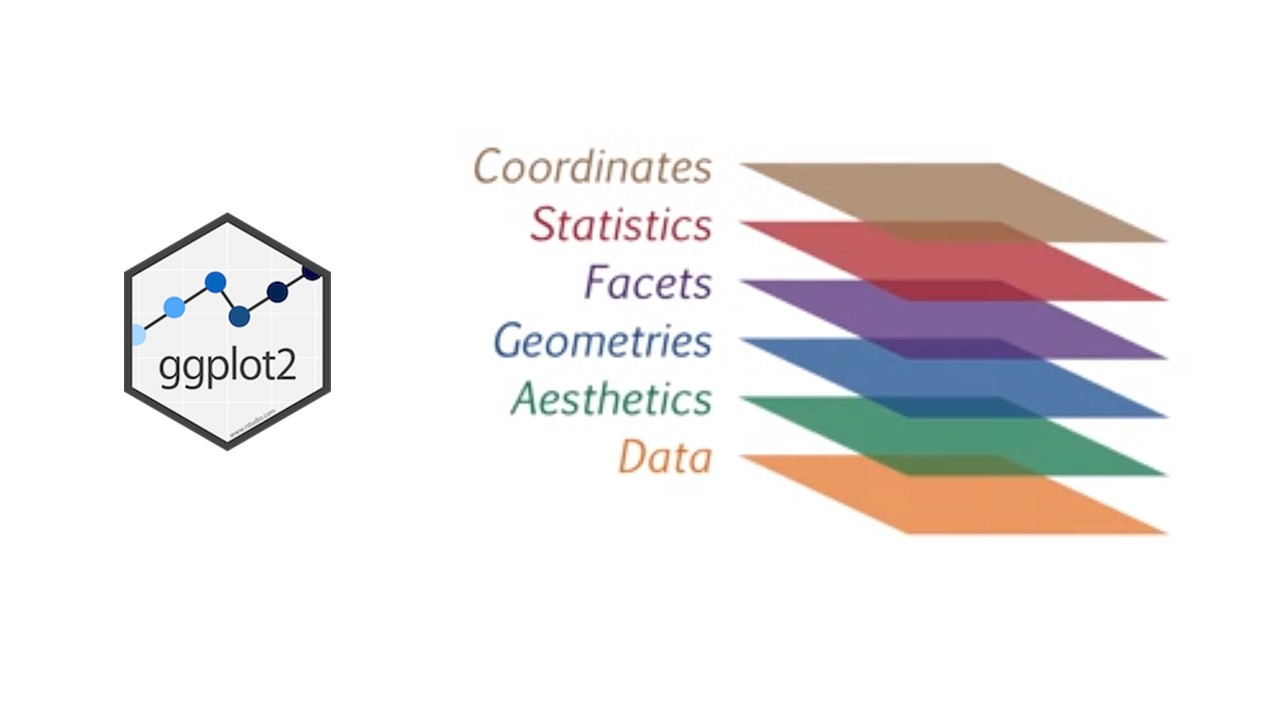

* Choosing the right graph is crucial in data visualization.
* Suitable graph depends on the data type and purpose of the graph.

## ggplot2

For using visualization with `ggplot2` we need 3 main components,

1. Data set: `data`
2. Aesthetic properties of the data: `aes()`
3. Geometry of the graph: `geom()`

#### Aesthetics

* Aesthetics are defined with the `aes` argument in ggplot and they are used to arrange various things like color, shape, labels and transparency of the graph.
* Each aesthetics object behave differently for type of data.
* Some of the aesthetic arguments are:
    - `color`
    - `fill`
    - `size`
    - `shape`
    - `alpha`
    - `stroke`
    - `linetype` ...

#### Geometries

* Geometries are used to define the type of graph.

    - `line`
    - `bar`
    - `area`
    - `scatterplot` ...

#### Install ggplot2

In [49]:
# install.packages("ggplot2")  # If you did not install it previously
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### Some basic graphs with ggplot

* **Scatterplot** are used with two continuous variables.


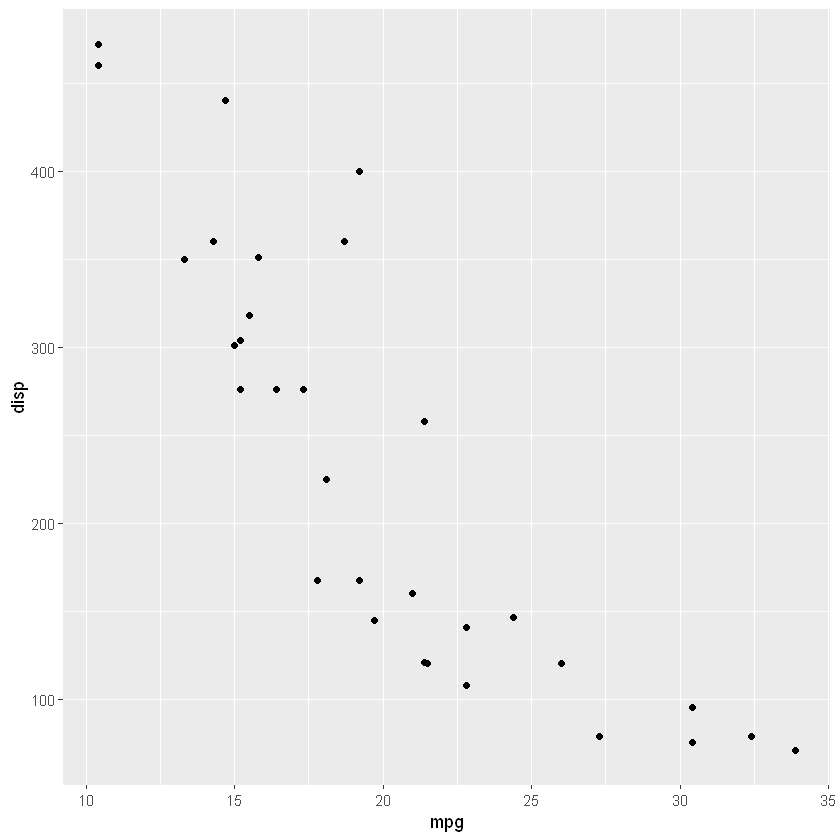

In [50]:
ggplot(mtcars)+
  geom_point(aes(x = mpg, y = disp))

* **Histogram** is used to see the distribution of a continuous variable.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


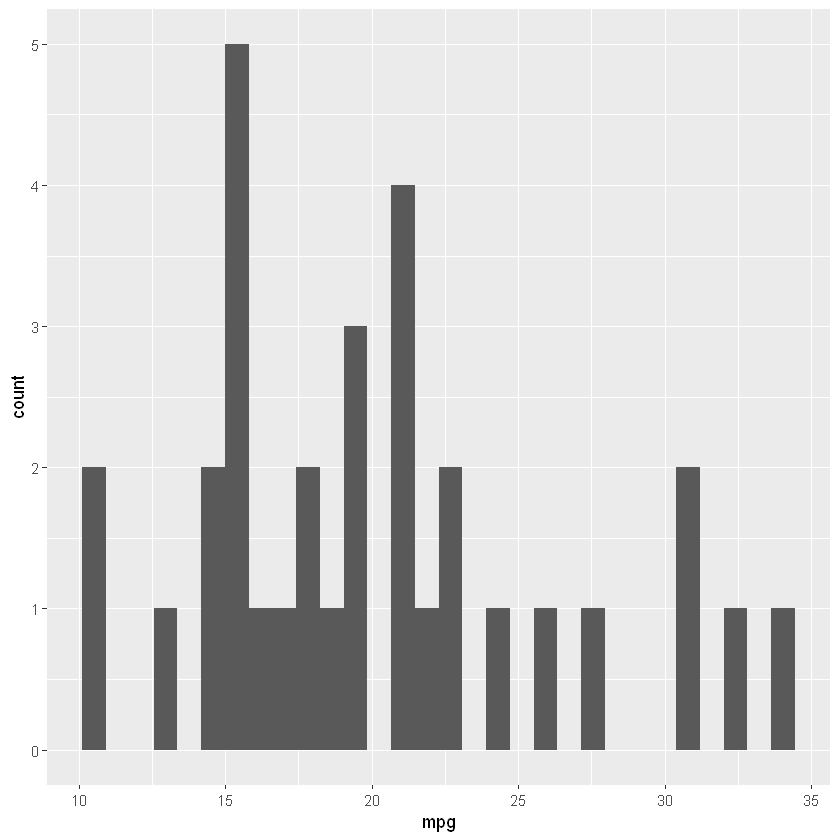

In [51]:
ggplot(mtcars)+
  geom_histogram(aes(mpg))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


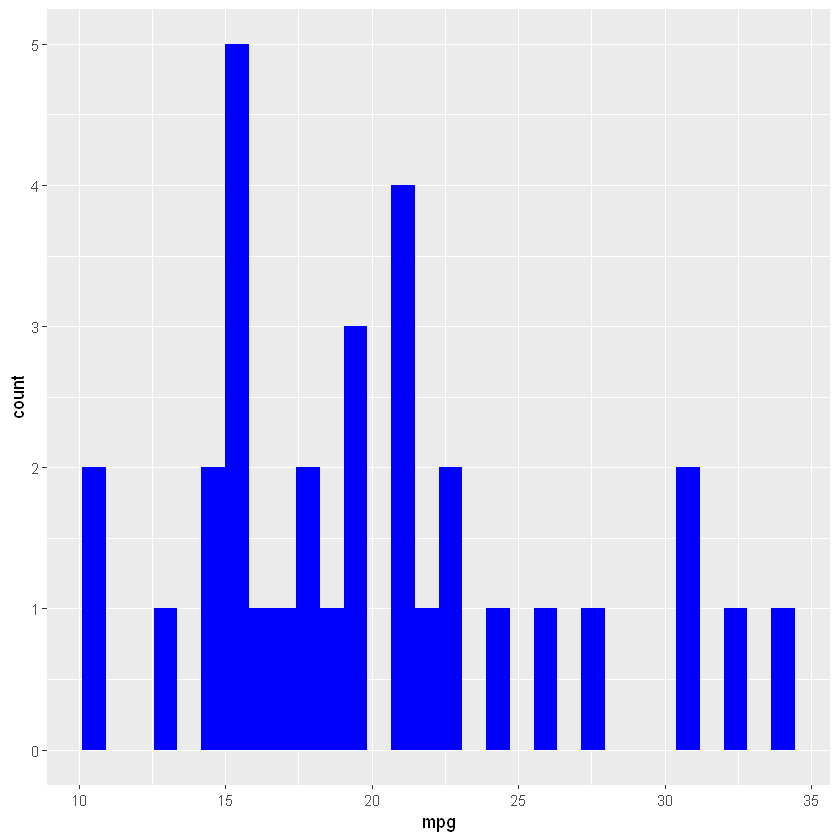

In [52]:
ggplot(mtcars)+
  geom_histogram(aes(mpg), fill = "blue")

* **barplot** is used to see the distribution of a categorical variable.


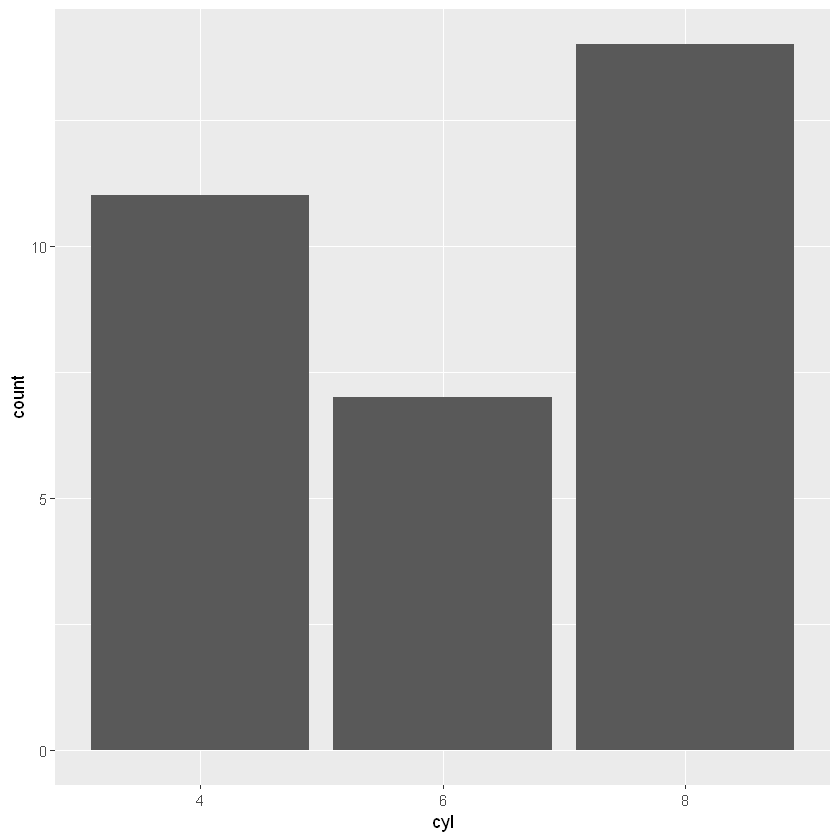

In [53]:
ggplot(mtcars)+
  geom_bar(aes(x = cyl))

* **boxplot** can be used to visualize the distribution of a continuous variable according to a categorical variable.

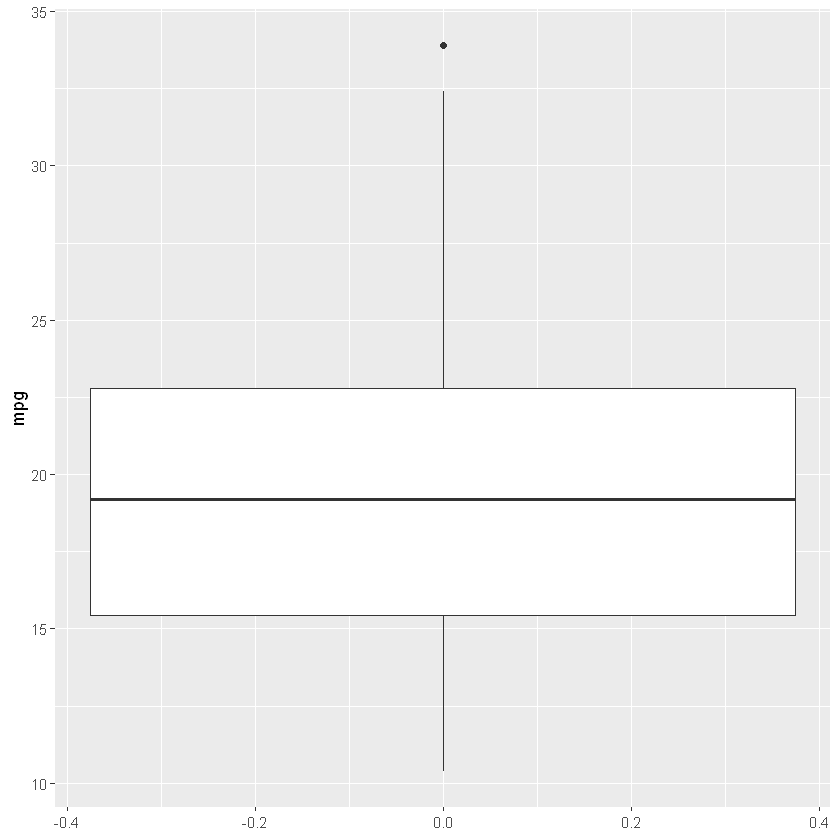

In [54]:
ggplot(mtcars)+
  geom_boxplot(aes(y= mpg))

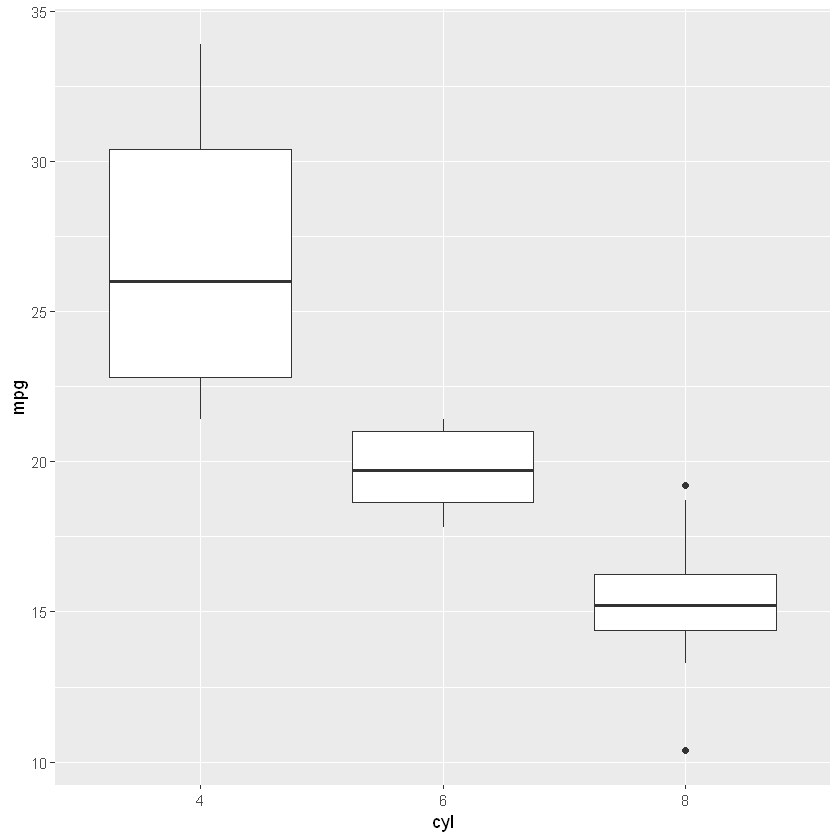

In [55]:
ggplot(mtcars)+
  geom_boxplot(aes(x= cyl, y= mpg))

* `ggplot2` is a flexible function. You can write the above code in several ways.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


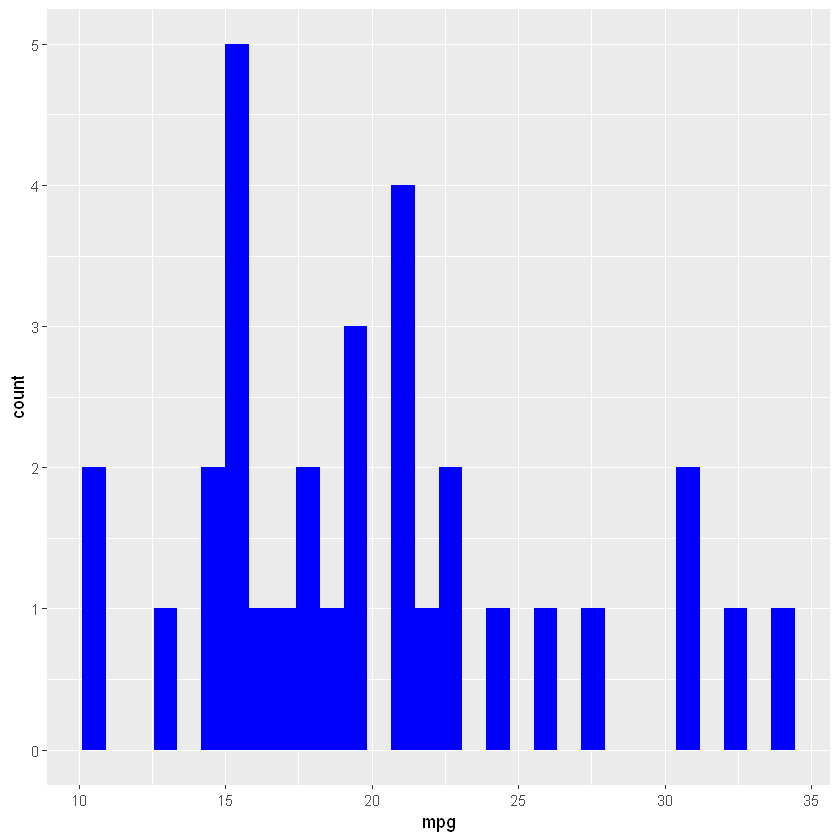

In [56]:
ggplot(mtcars) +
    geom_histogram(aes(mpg),fill = "blue")

### Some Aesthetic Properties

#### color

- `color` : Changes the color of graph. In that kind of usage the argument should be placed outside the `aes()` argument.


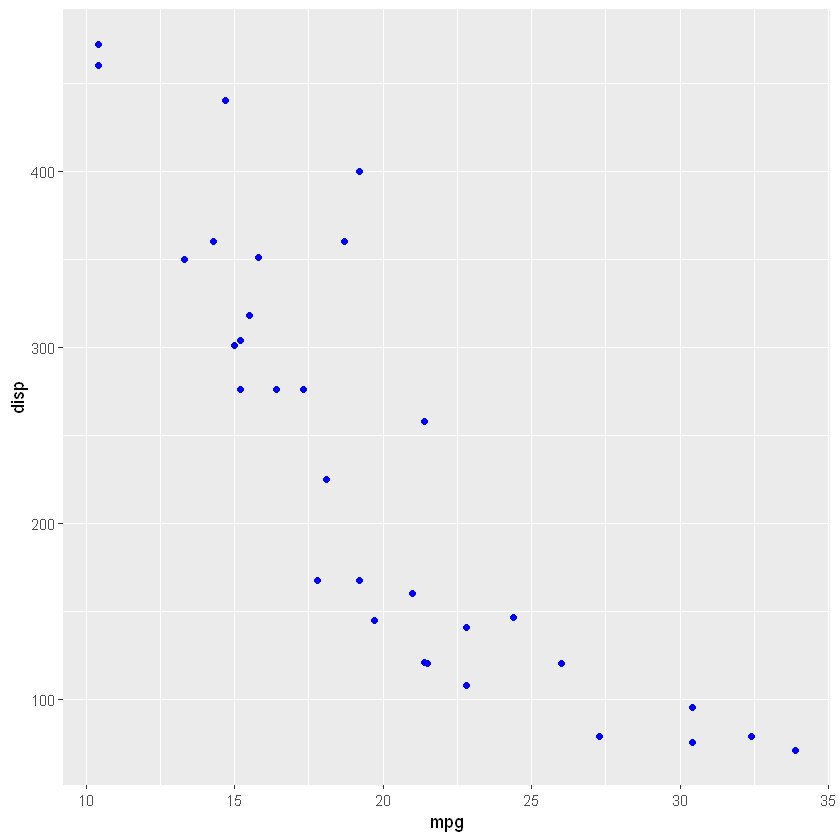

In [57]:
ggplot(mtcars)+
  geom_point(aes(x = mpg, y = disp), color = "blue")

* `color` argument can also be used to color different categories and can add an additional layer to the graph. In that kind of usage the argument should be placed inside the `aes()` argument and a variable should be assigned to the `color` argument.


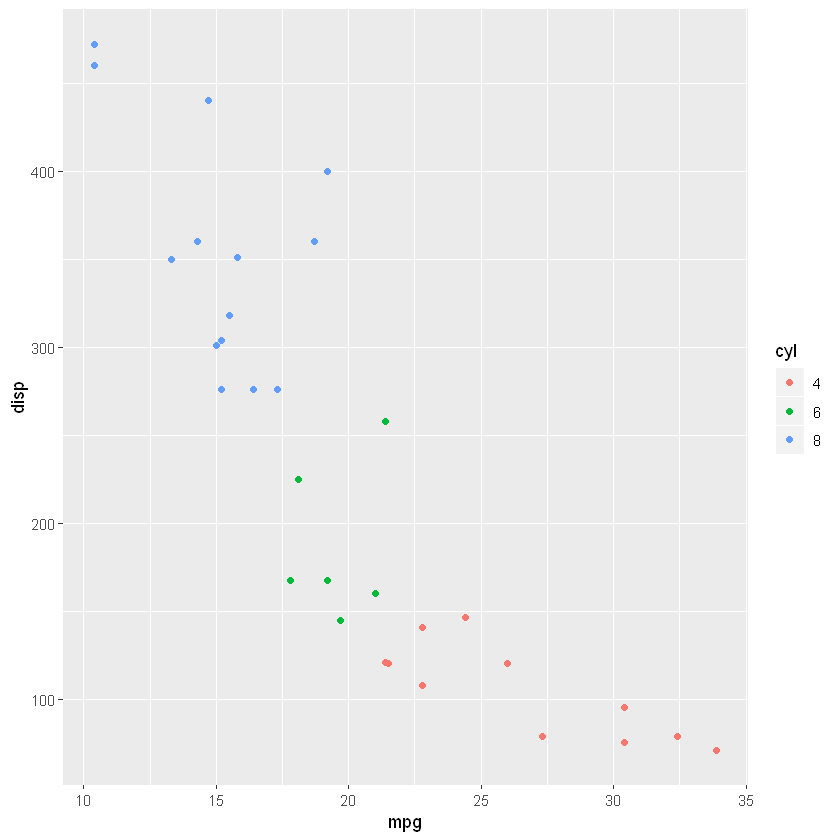

In [58]:
ggplot(mtcars)+
  geom_point(aes(x = mpg, y = disp, color = cyl))

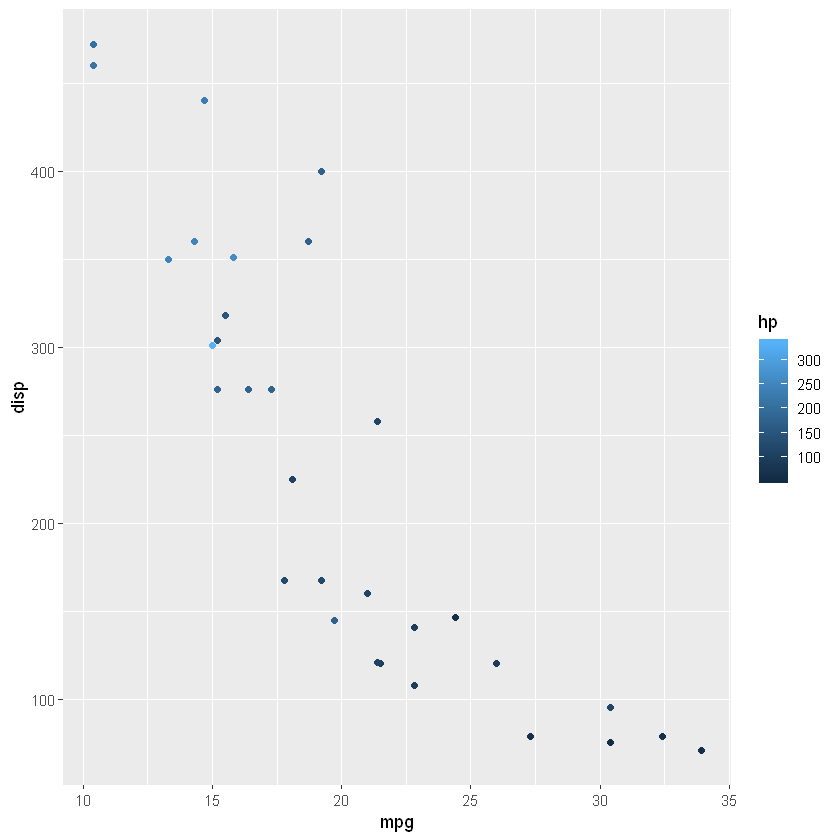

In [59]:
ggplot(mtcars)+
  geom_point( aes(x = mpg, y = disp, color = hp))

#### size

* `size` argument is used for adding the effect of a continuous variable to the graph by adding size. `size` argument is not preferred for categorical variables, it should be used for continuous variables.

* The same logic given with the `color` argument is also valid here.
* If you want to change the size of all the points, `size` argument should be defined outside the `aes()` argument.


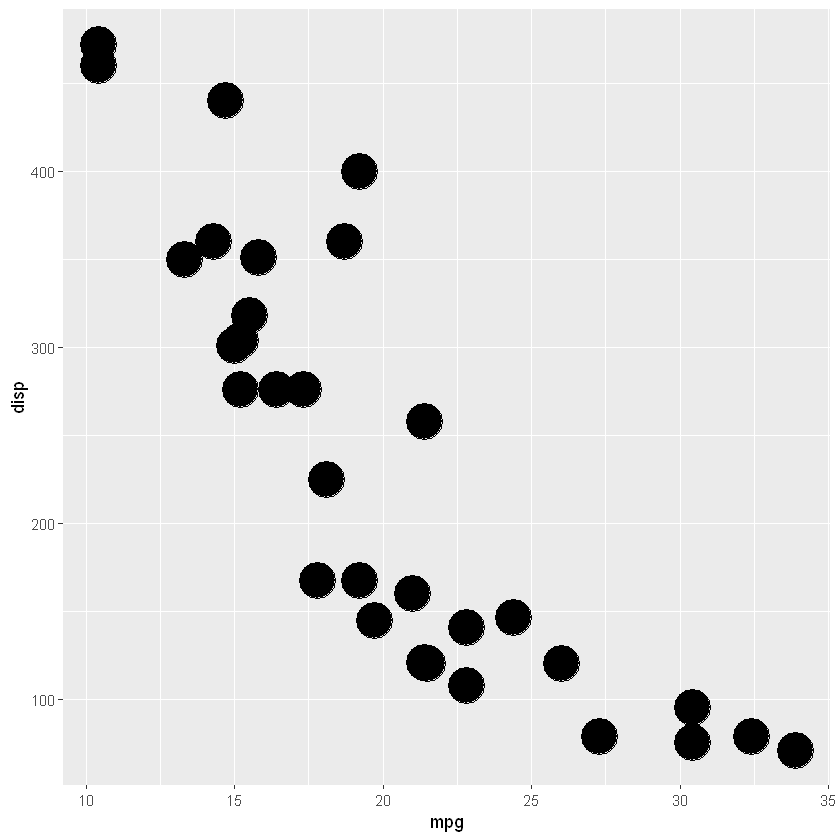

In [60]:
ggplot(mtcars)+
  geom_point(aes(x = mpg, y = disp),size = 10)

* If you want to change the size of the points based on another variable, `size` argument should be defined inside the `aes()` argument.


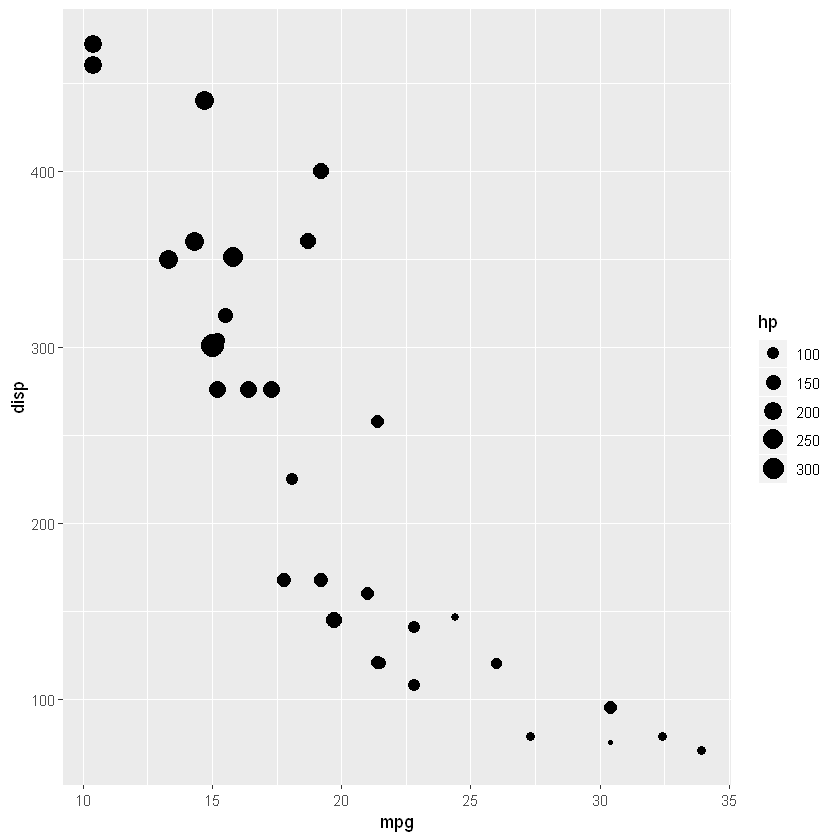

In [61]:
ggplot(mtcars)+
  geom_point(aes(x = mpg, y = disp, size = hp))

#### alpha

- `alpha` is the argument used for transparency.
- It is mostly used for continuous variables.
- `alpha` value ranges between 0 and 1.
- `alpha` should be used along with the `mapping` parameter.

* If you want to change the transparency of all the points, `alpha` argument should be defined outside the `aes()` argument.


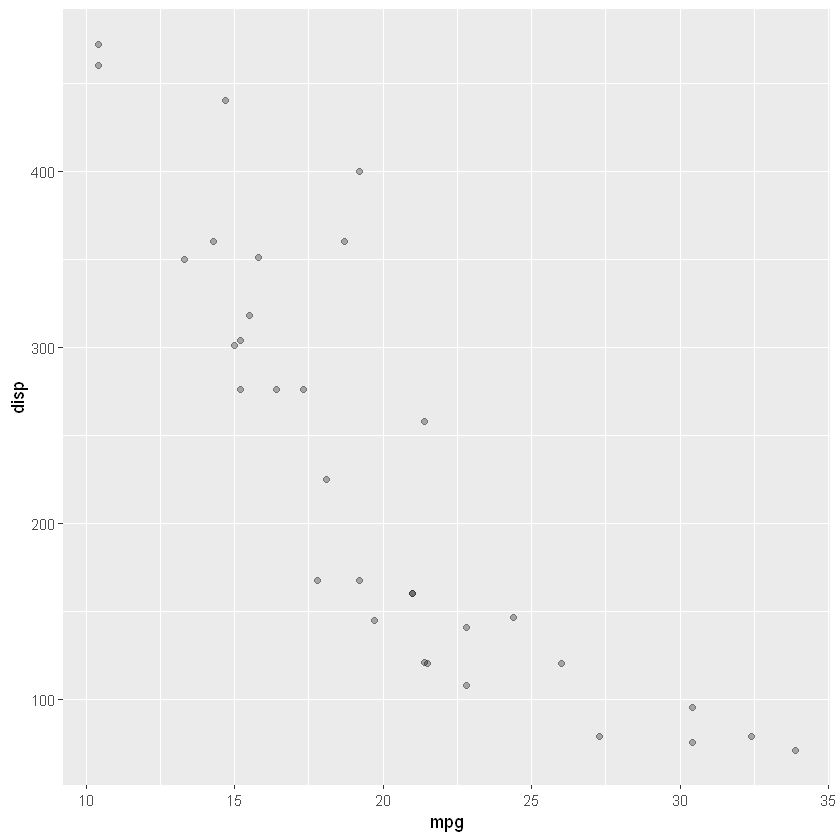

In [62]:
ggplot(mtcars)+
  geom_point( mapping = aes(x = mpg, y = disp), alpha = 0.3)

* If you want to change the transparency of the points based on another variable, `alpha` argument should be defined inside the `aes()` argument.


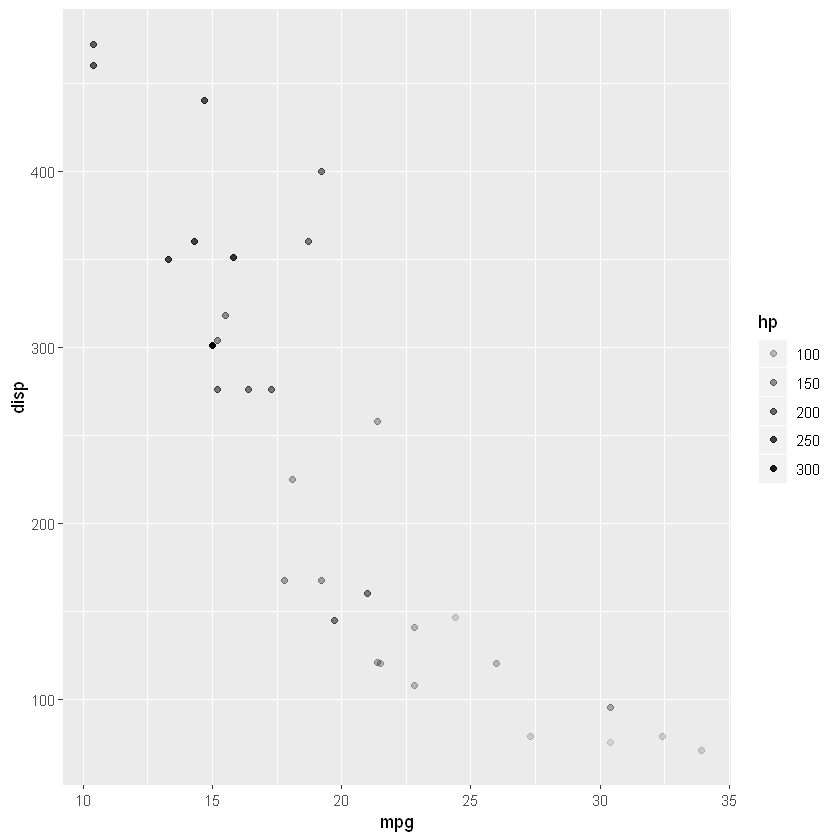

In [63]:
ggplot(mtcars)+
  geom_point(aes(x = mpg, y = disp, alpha = hp))

#### shape

- `shape` gives different shapes to different categories.
- `shape` argument works in categorical variables with maximum 6 categories.

* If you want to change the shape of all the points, `shape` argument should be defined outside the `aes()` argument.


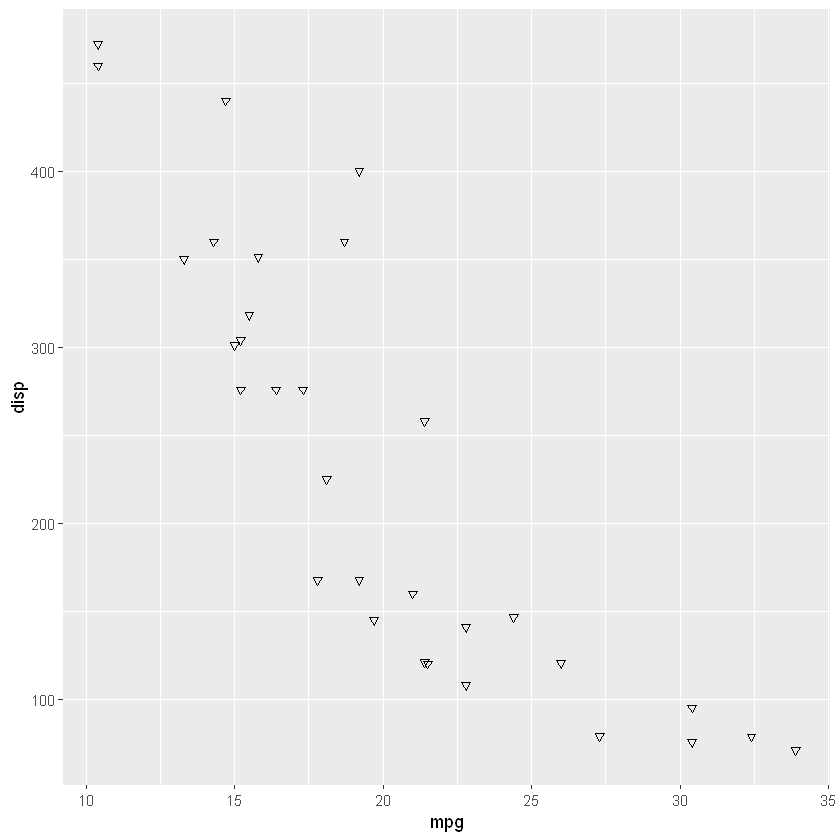

In [64]:
ggplot(mtcars)+
  geom_point(aes(x = mpg, y = disp), shape = 25)

* If you want to change the shape of the points based on another variable, `shape` argument should be defined inside the `aes()` argument.


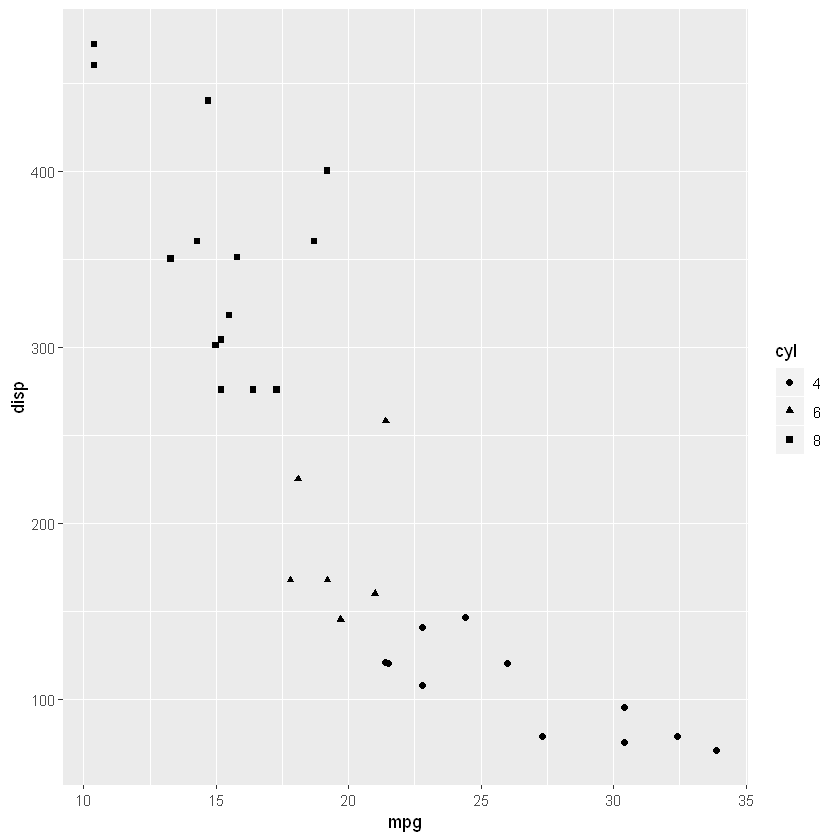

In [65]:
ggplot(mtcars)+
  geom_point(aes(x = mpg, y = disp, shape = cyl))

### Facets

* Above we showed that one way to add additional variable to graph is by using `aes()`.
* Another way is to use `facets`.
* `facets` divides the plot into subplots based on a discrete or categorical variable.
* The first argument is the `facet_wrap` argument is used with a formula `~` sign.


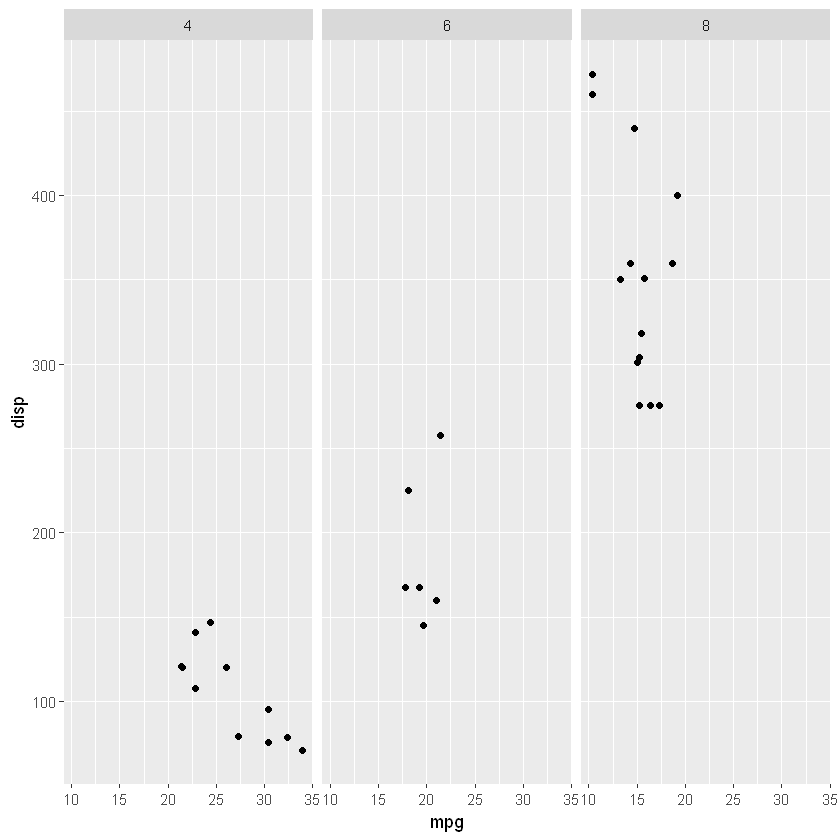

In [66]:
ggplot(mtcars)+
  geom_point(aes(x = mpg, y = disp)) +
  facet_wrap(~ cyl, nrow = 1)

* Combination of two variables is also possible with `facet_grid()`


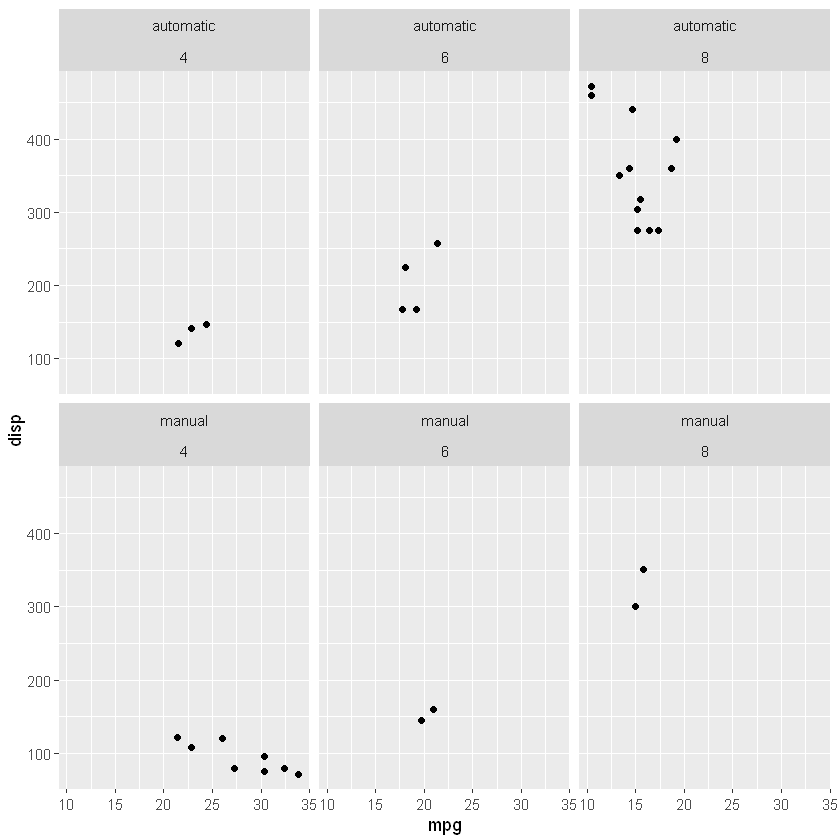

In [67]:
ggplot(mtcars)+
  geom_point(aes(x = mpg, y = disp)) +
  facet_wrap(am~ cyl, nrow = 2)

### geom_bar(), geom_col() and statistical transformations

* Bar charts are used to find some information of categorical variables.

* There are two types of bar charts: `geom_bar()` and `geom_col()`.
    * `geom_bar()` makes the height of the bar proportional to the number of cases in each group (or if the weight aesthetic is supplied, the sum of the weights).
    * If you want the heights of the bars to represent values in the data, use `geom_col()`

* To see the distribution of only one variable use `geom_bar()`.


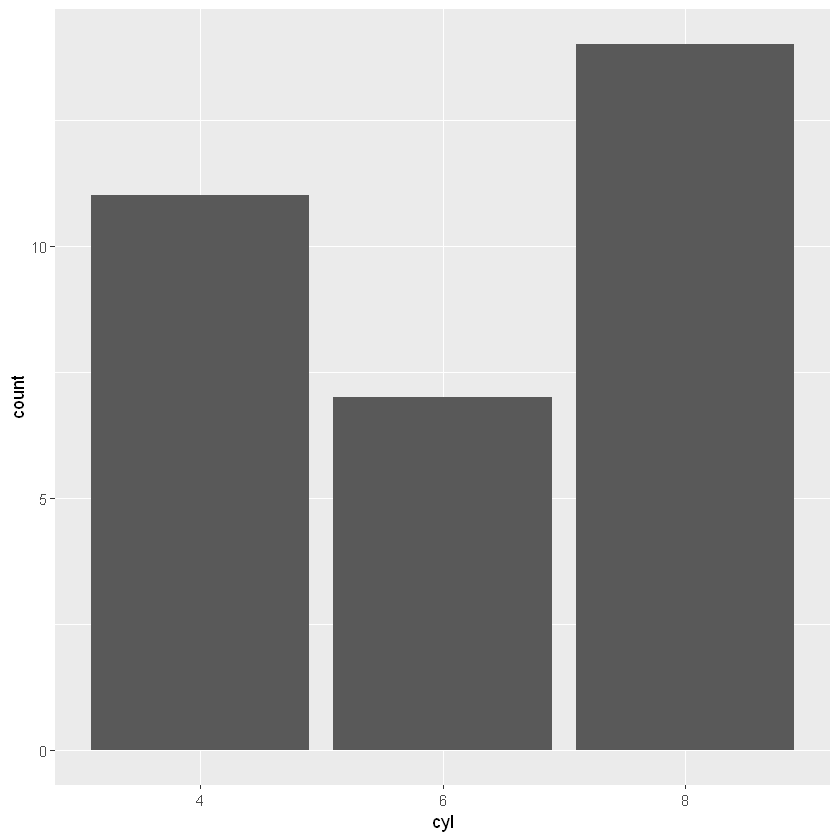

In [68]:
ggplot(mtcars)+
  geom_bar(aes(x = cyl))

* To see the distribution of a continuous variable based on a categorical variable use `geom_col()`.


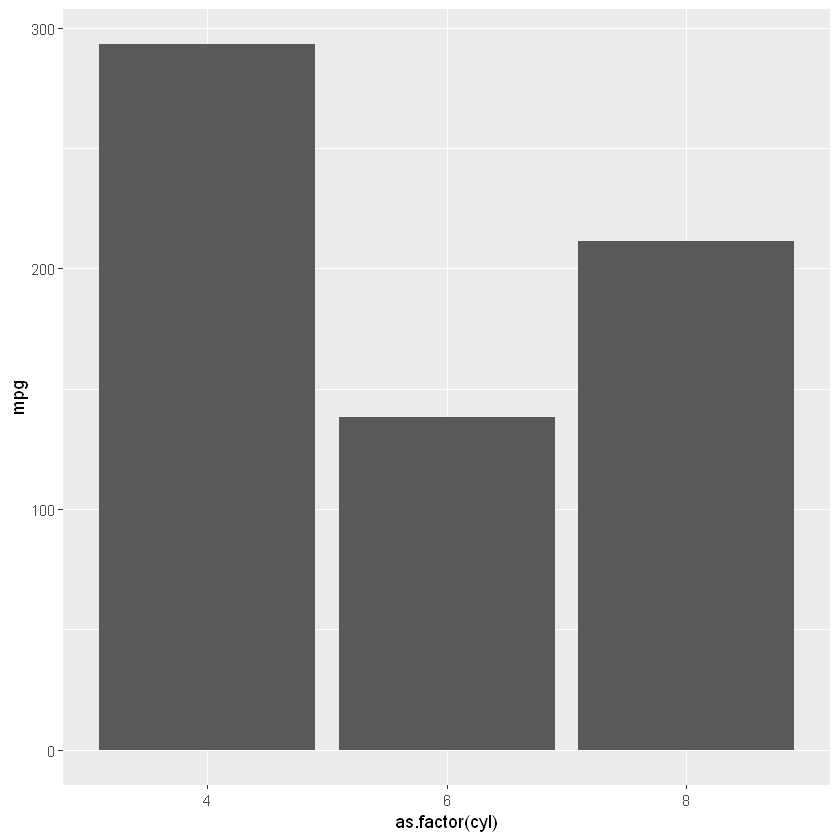

In [69]:
ggplot(mtcars)+
  geom_col(aes(x = as.factor(cyl), y=mpg))

* By default `geom_col()` stack all the values and sums them. You should use some `dplyr` skills yo make more meaningful graphs

In [70]:
library(dplyr)

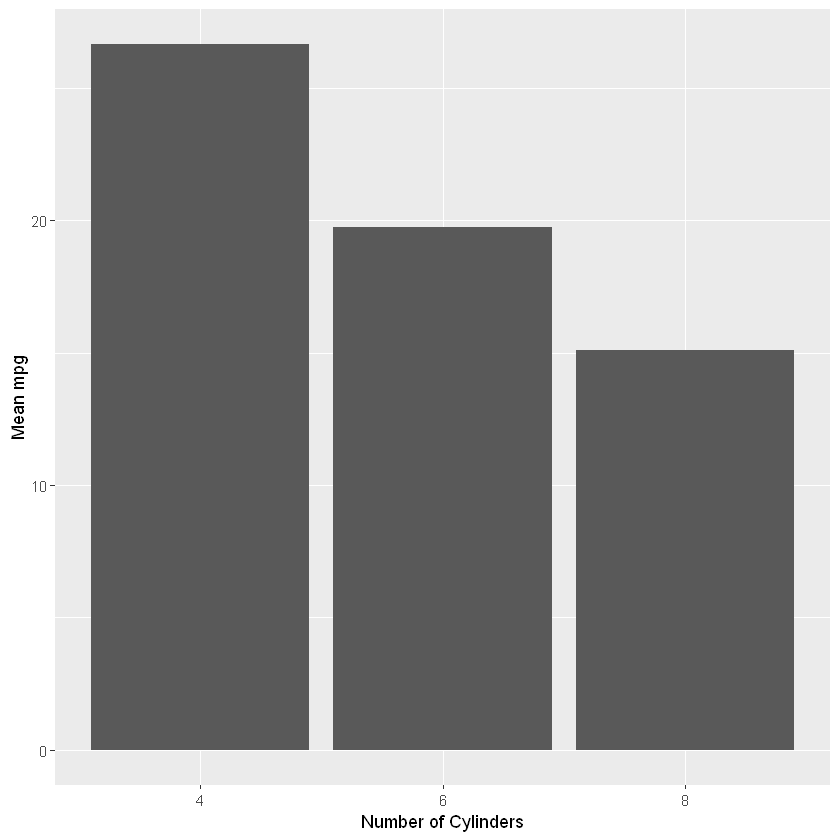

In [71]:
ggplot(data =mtcars %>% group_by(cyl) %>% summarise(mean_mpg = mean(mpg)))+
  geom_col(aes(x = (as.factor(cyl)), y= mean_mpg))+
  ylab("Mean mpg")+
  xlab("Number of Cylinders")

* Bar charts can be colored with the `color` or `fill` argument.


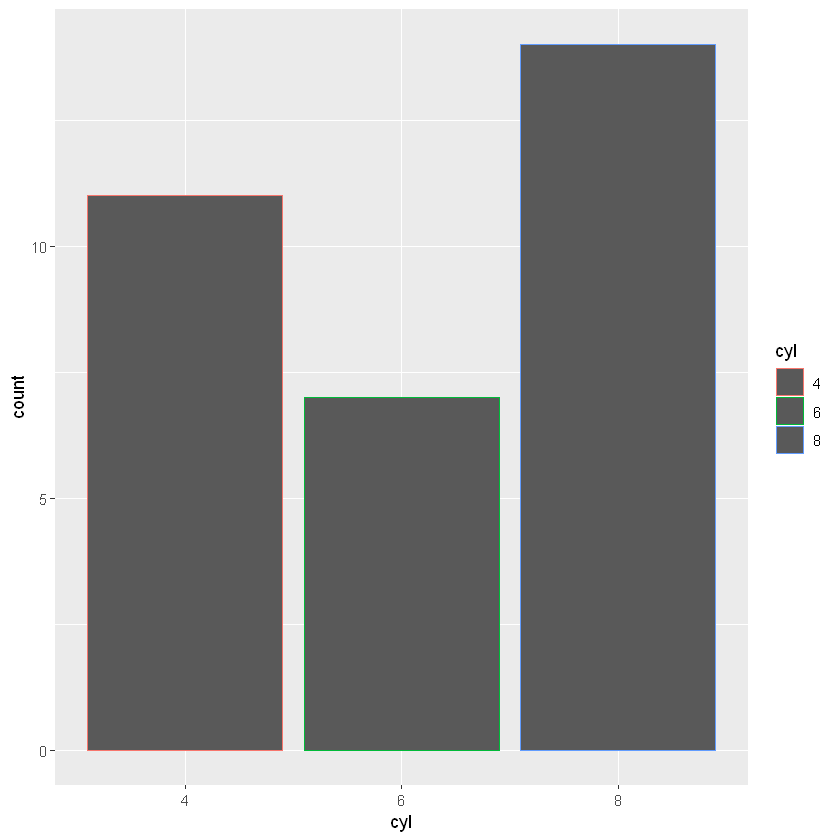

In [72]:
ggplot(mtcars)+
  geom_bar(aes(x = cyl, color = cyl))

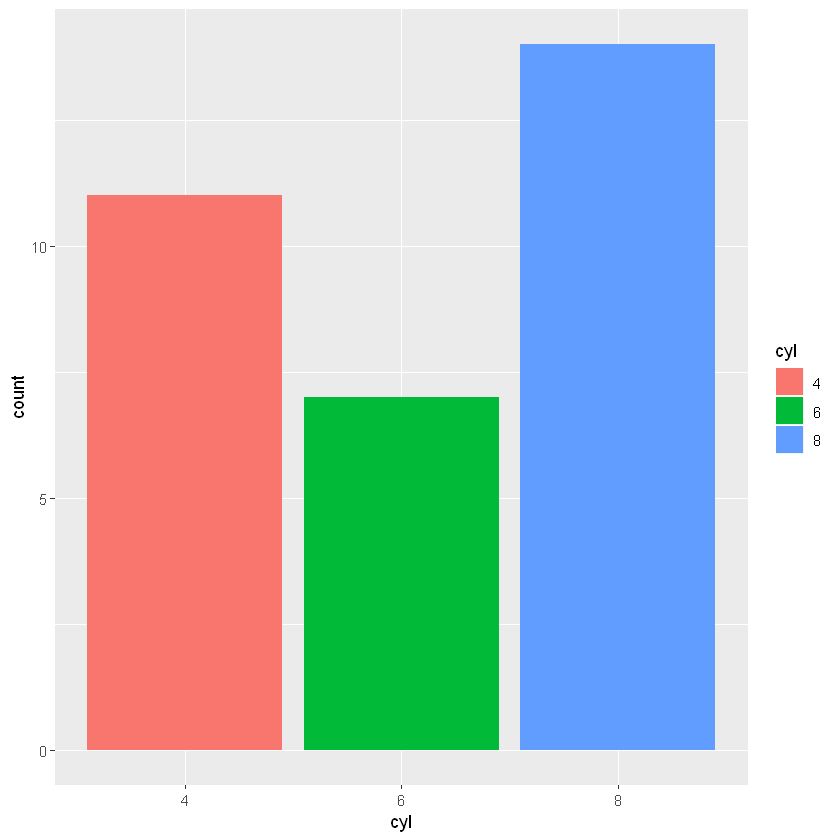

In [73]:
ggplot(mtcars)+
  geom_bar(aes(x = cyl, fill = cyl))

### A few improvements in ggplot

* Now we will make a little visual improvements on a `ggplot2` graph by adding titles and changing theme of the graph.


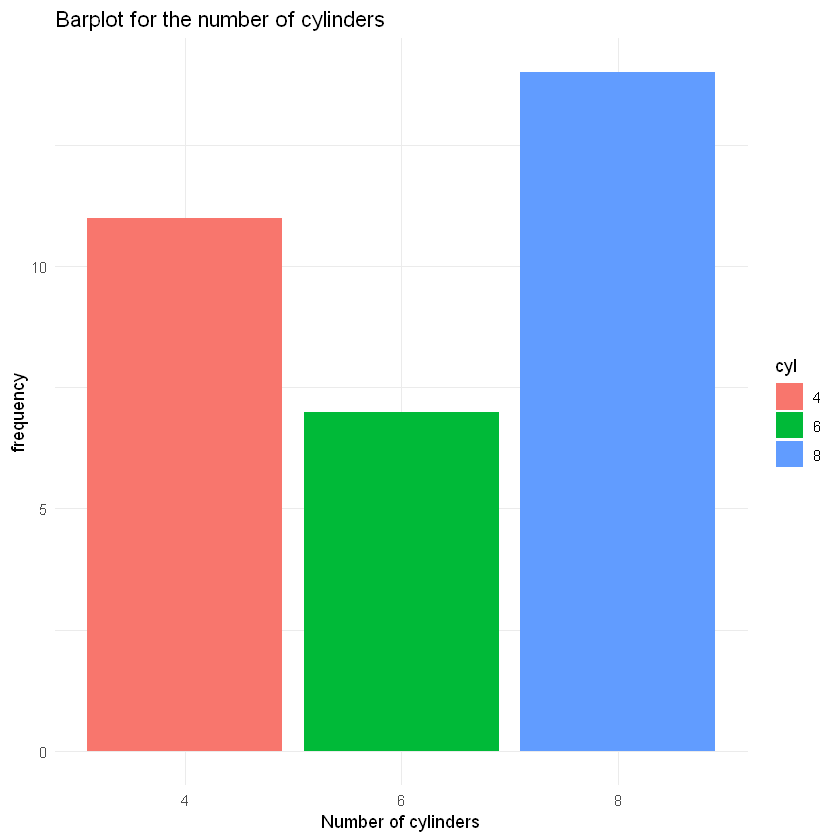

In [74]:
ggplot(mtcars)+
  geom_bar(aes(x = cyl, fill = cyl)) +
           ggtitle("Barplot for the number of cylinders") +
           xlab("Number of cylinders") +
           ylab("frequency") +
           theme_minimal()

### Some other graphs

* Now I will make a scatterplot matrix.
* Scatterplot is used to visualize two continuous variables so I need to determine all the continuous variables in a dataset.
* `pairs()` function can be used to construct a scatterplot matrix.

In [75]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : Factor w/ 2 levels "V-shaped","straight": 1 1 2 2 1 2 1 2 2 2 ...
 $ am  : Factor w/ 2 levels "automatic","manual": 2 2 2 1 1 1 1 1 1 1 ...
 $ gear: Factor w/ 3 levels "3","4","5": 2 2 2 1 1 1 1 2 2 2 ...
 $ carb: Factor w/ 6 levels "1","2","3","4",..: 4 4 1 1 2 1 4 2 2 4 ...


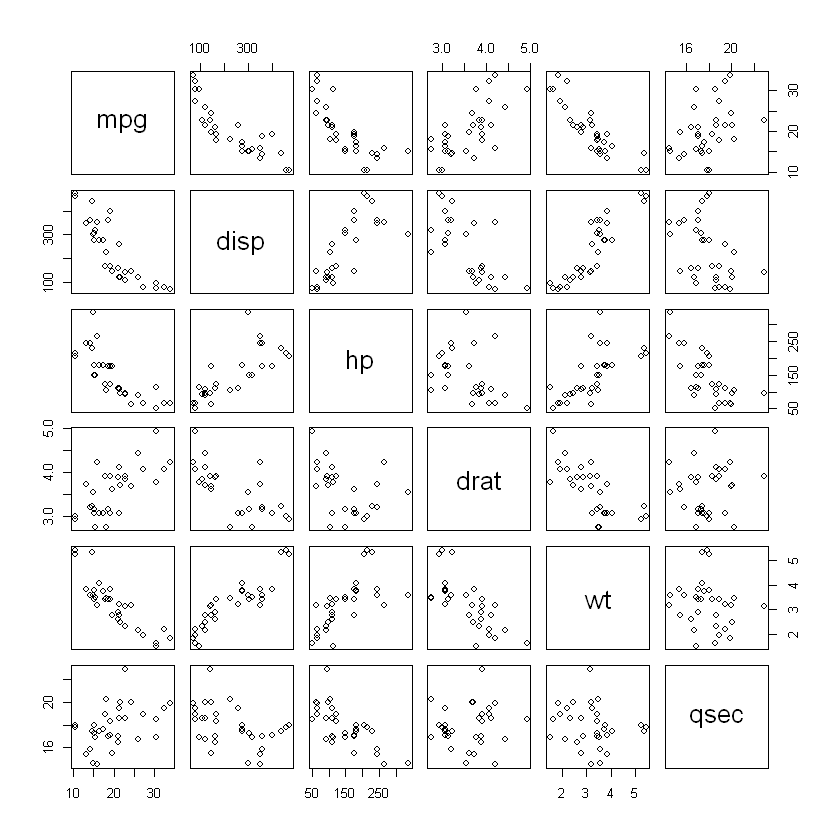

In [76]:
pairs(mtcars[,c(1,3:7)])

## Pima Dataset Example

### Pima Data Set

* Indian females of Pima heritage (Native americans living in an area consisting of what is now central and southern Arizona)
* Columns (or Variables) of the Pima data set:
    * **NTP**: number of times pregnant
    * **PGC**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    * **DBP**: Diastolic blood pressure (mm Hg)
    * **TSFT**: Triceps skin fold thickness (mm)
    * **SI**: 2-Hour serum insulin (mu U/ml)
    * **BMI**: Body mass index (weight in kg/(height in meter square))
    * **Diabetes pedigree function**:
    * **Age**: Age (years)
    * **Diabetes**: f0,1g value 1 is interpreted as "tested positive for diabetes".

In [79]:
pima <- read.csv("pima.csv")

In [80]:
str(pima)

'data.frame':	768 obs. of  9 variables:
 $ NTP     : int  6 1 8 1 0 5 3 10 2 8 ...
 $ PGC     : int  148 85 183 89 137 116 78 115 197 125 ...
 $ DBP     : int  72 66 64 66 40 74 50 0 70 96 ...
 $ TSFT    : int  35 29 0 23 35 0 32 0 45 0 ...
 $ SI      : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DPF     : num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Diabetes: Factor w/ 2 levels "negative","positive": 2 1 2 1 2 1 2 1 2 2 ...


In [81]:
head(pima)

NTP,PGC,DBP,TSFT,SI,BMI,DPF,Age,Diabetes
6,148,72,35,0,33.6,0.627,50,positive
1,85,66,29,0,26.6,0.351,31,negative
8,183,64,0,0,23.3,0.672,32,positive
1,89,66,23,94,28.1,0.167,21,negative
0,137,40,35,168,43.1,2.288,33,positive
5,116,74,0,0,25.6,0.201,30,negative


In [82]:
summary(pima)

      NTP              PGC             DBP              TSFT      
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
       SI             BMI             DPF              Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
     Diabetes  
 negative:500  
 positive:268  
               
     

* First let's create age groups and visualize it with a suitable graph.
* From the summary table, we can see that age varies from 21 to 81.

In [83]:
pima$AgeGroups <- cut(pima$Age,c(20,40,60,81))
table(pima$AgeGroups)


(20,40] (40,60] (60,81] 
    574     167      27 

### Barplot

* Let's use barplot to visualize this.

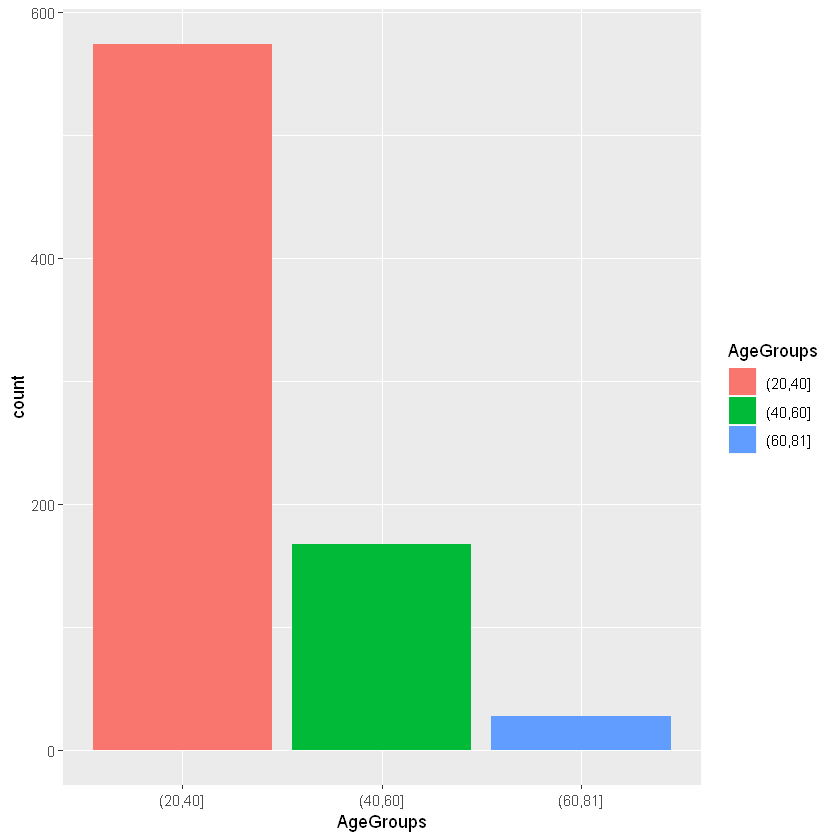

In [84]:
ggplot(pima) +
  geom_bar(aes(x=AgeGroups, fill = AgeGroups))

* Now, we want to see the effect of Age Groups on diabetes.
* Again we will use barplots.

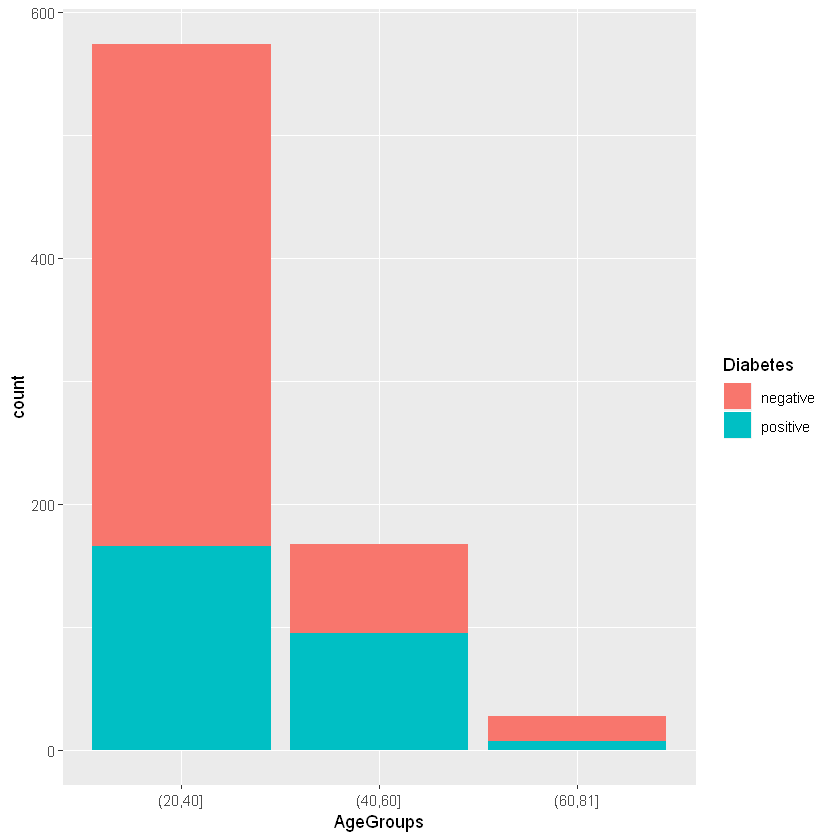

In [85]:
ggplot(pima) +
  geom_bar(aes(x=AgeGroups, fill = Diabetes))

* To give barplots in unstacked way you can use additional argument `position = "dodge"`

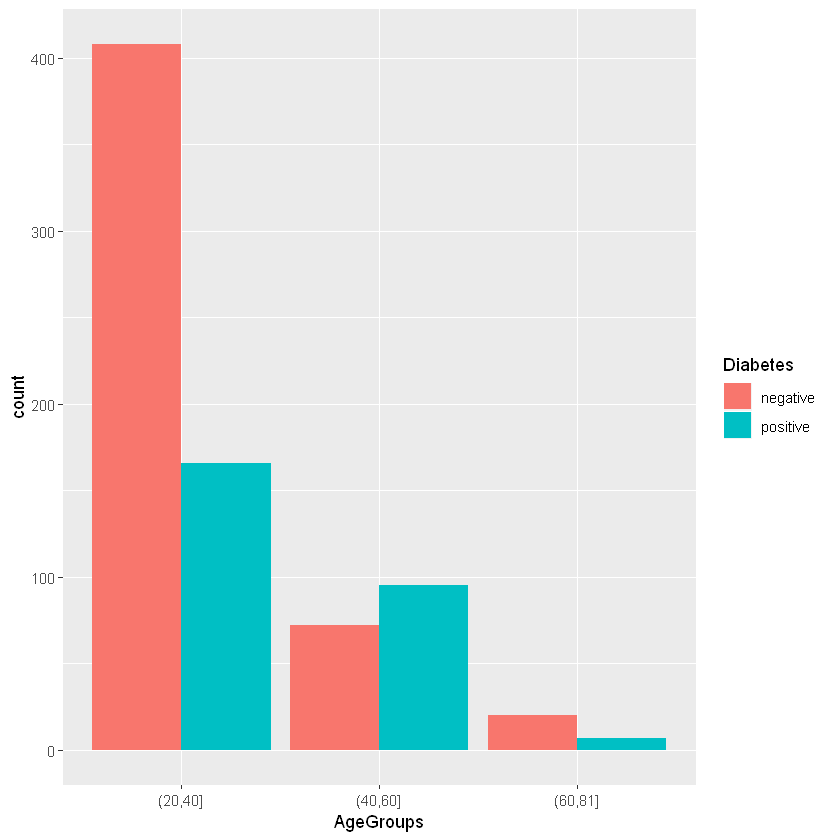

In [86]:
ggplot(pima) +
  geom_bar(aes(x=AgeGroups, fill = Diabetes), position= 'dodge')

* Now see how BMI changes in each age group, based on existence of diabetes.


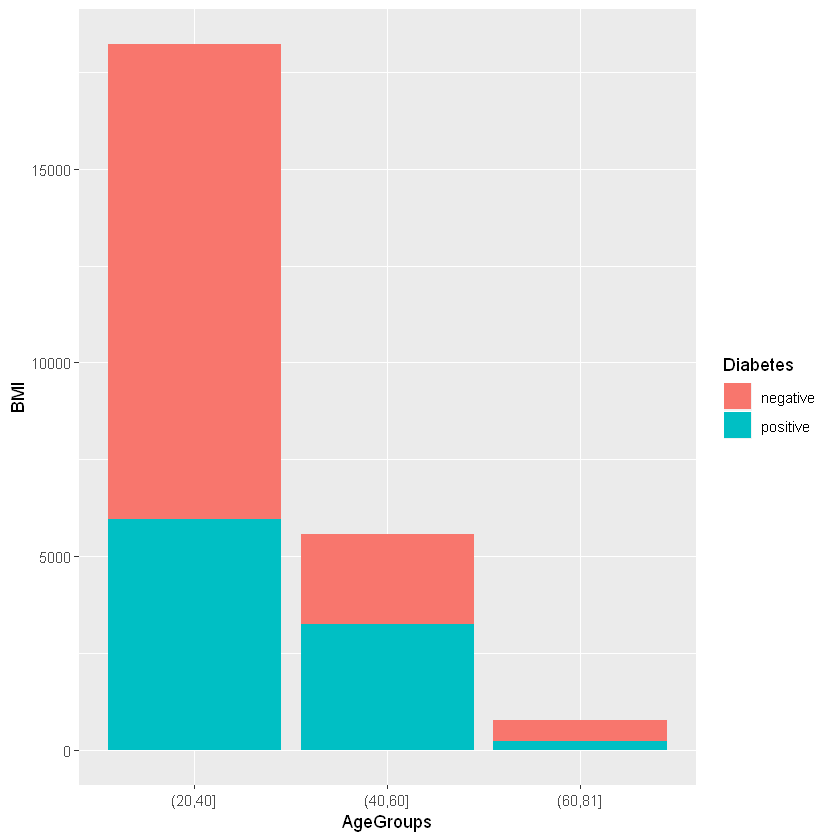

In [87]:
ggplot(pima) +
  geom_col(aes(x=AgeGroups, y = BMI, fill = Diabetes))

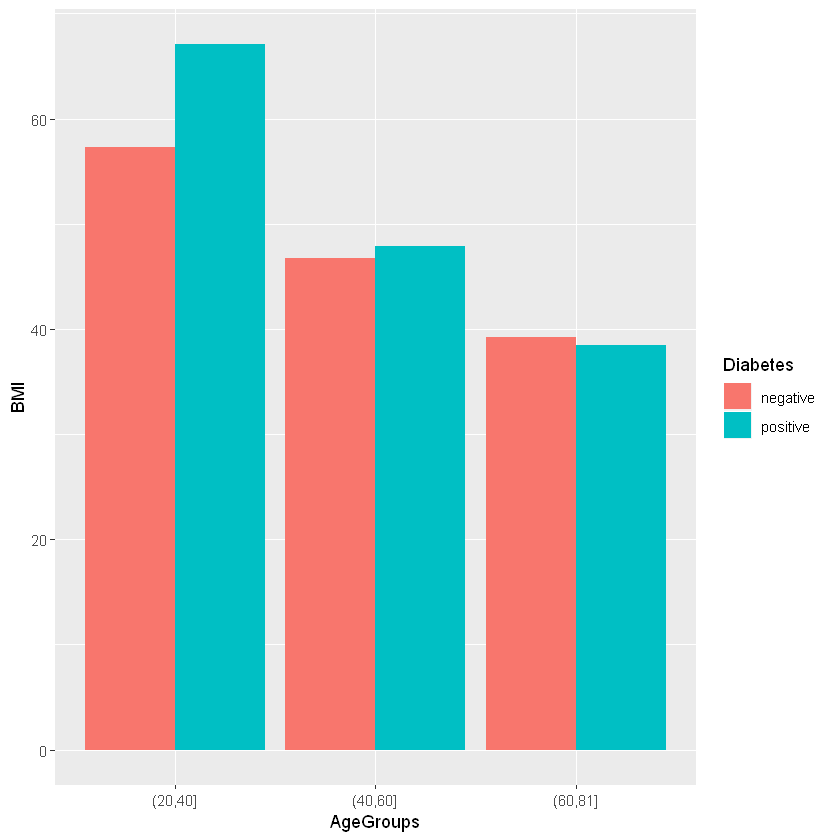

In [88]:
ggplot(pima) +
  geom_col(aes(x=AgeGroups, y = BMI, fill = Diabetes), 
           position = 'dodge')

* This time use the combination of `dplyr`, `geom_col()` and `facet_wrap()` to visualize the average BMI for each age group and existence of diabetes.


In [89]:
pima %>% group_by(AgeGroups, Diabetes) %>% summarise(mean_BMI = mean(BMI))

AgeGroups,Diabetes,mean_BMI
"(20,40]",negative,30.09363
"(20,40]",positive,35.82108
"(40,60]",negative,32.48472
"(40,60]",positive,34.10526
"(60,81]",negative,26.75000
"(60,81]",positive,33.12857


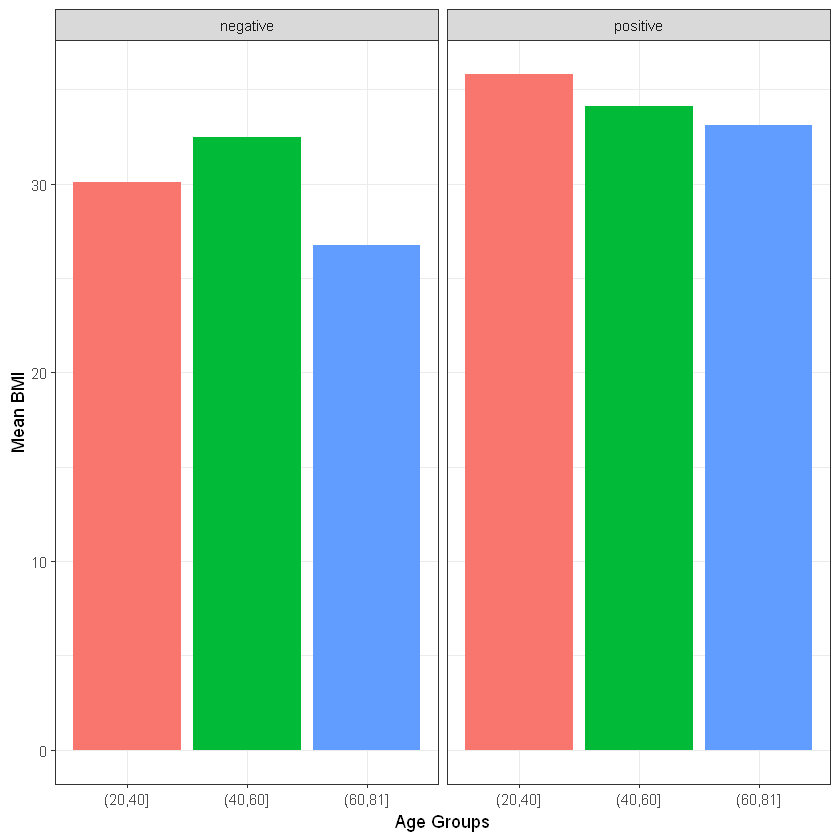

In [90]:
ggplot(data =pima %>% group_by(AgeGroups, Diabetes) %>% summarise(mean_BMI = mean(BMI)))+
  geom_col(aes(x = AgeGroups, y= mean_BMI, fill = AgeGroups),
           show.legend = F)+
  facet_wrap(~Diabetes)+
  ylab("Mean BMI")+
  xlab("Age Groups")+
  theme_bw()

### Histogram

* Now let's draw histogram of BMI.

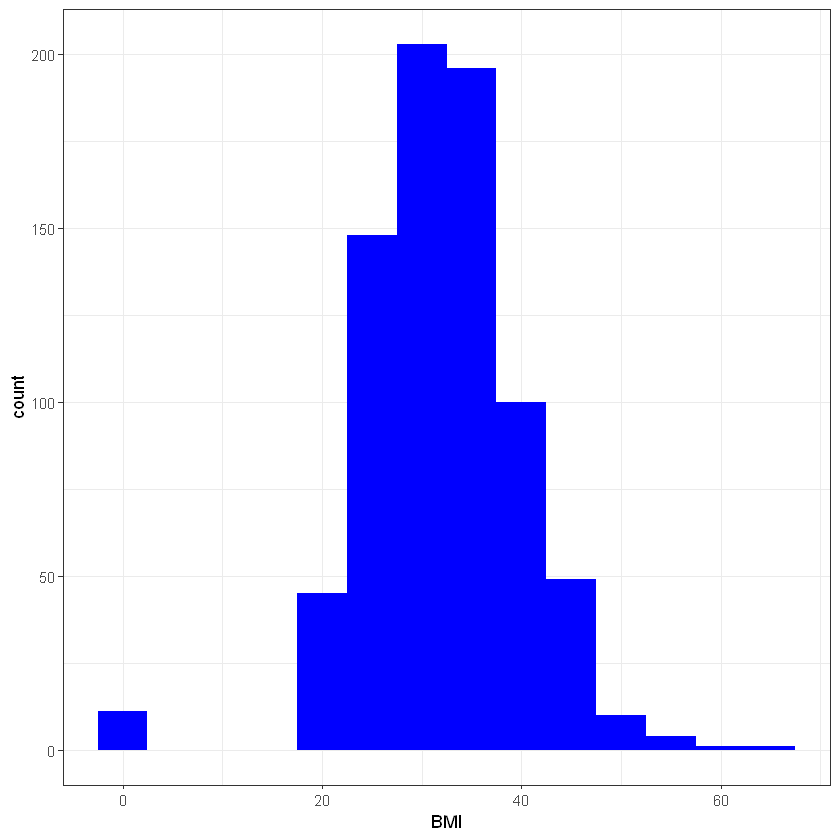

In [91]:
ggplot(pima, aes(BMI))+
  geom_histogram(binwidth = 5, fill = "blue")+
  theme_bw()

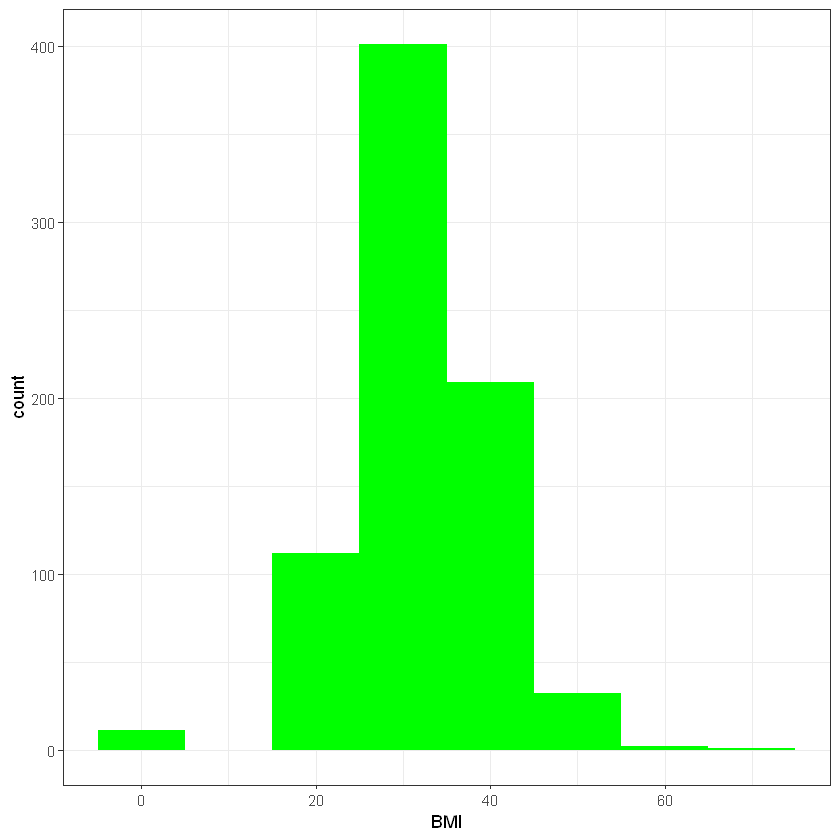

In [92]:
ggplot(pima, aes(BMI))+
  geom_histogram(binwidth = 10, fill = "green")+
  theme_bw()

* Now see how the histogram of BMI (Body Mass Index) changes with Diabetes.


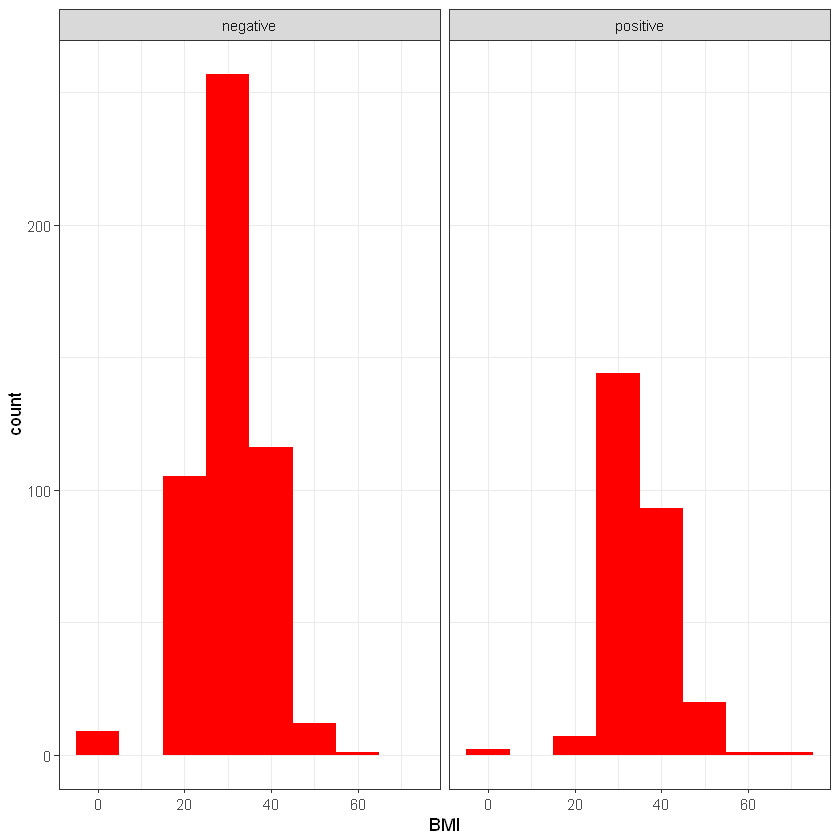

In [93]:
ggplot(pima, aes(BMI))+
  geom_histogram(binwidth = 10, fill = "red")+
  theme_bw()+
  facet_grid(~ Diabetes)

* Now look at another histogram.
* Draw the histogram of NTP (Number of times getting pregnant) grouped by both Diabetes and Age Groups.


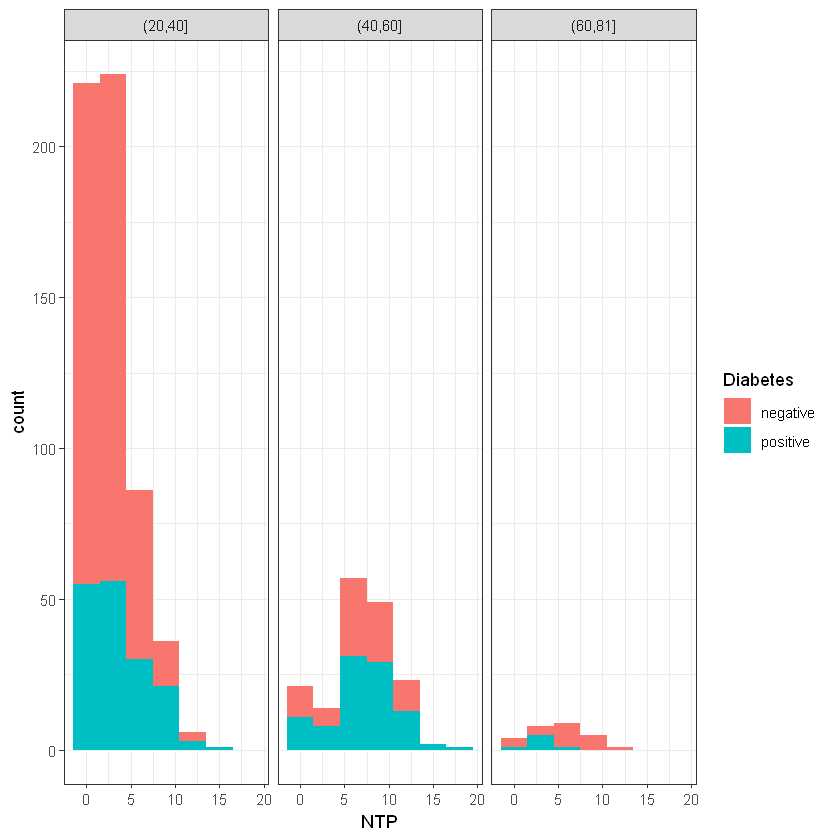

In [94]:
ggplot(pima, aes(NTP, fill= Diabetes))+
  geom_histogram(binwidth = 3)+
  theme_bw()+
  facet_grid(~ AgeGroups)

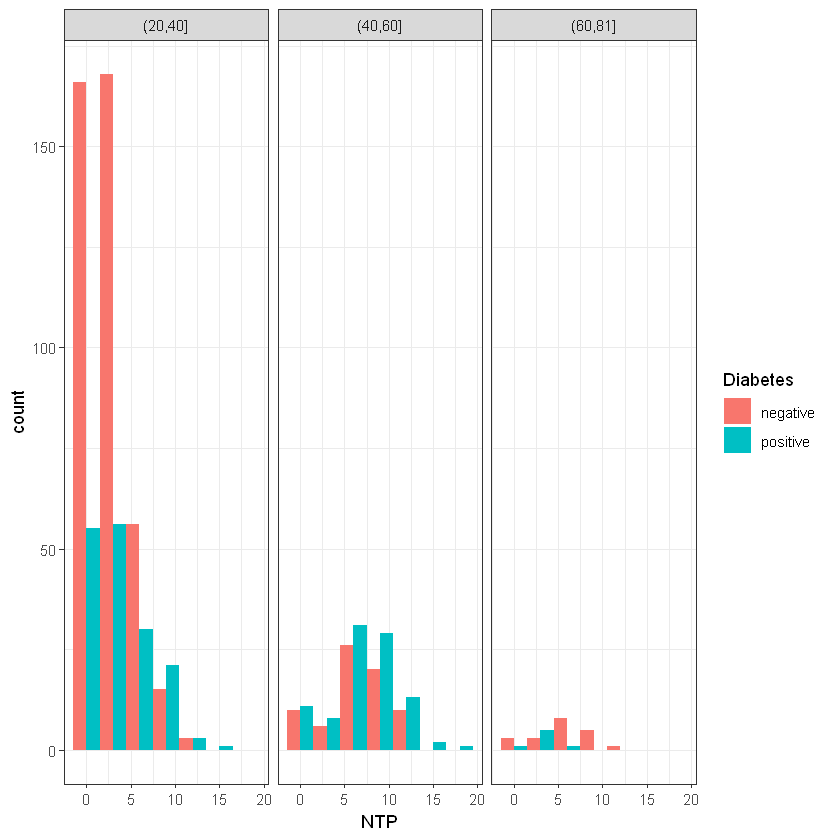

In [95]:
ggplot(pima, aes(NTP, fill= Diabetes))+
  geom_histogram(binwidth = 3, position = 'dodge')+
  theme_bw()+
  facet_grid(~ AgeGroups)

### Boxplot

* Let's see the boxplot of NTP.

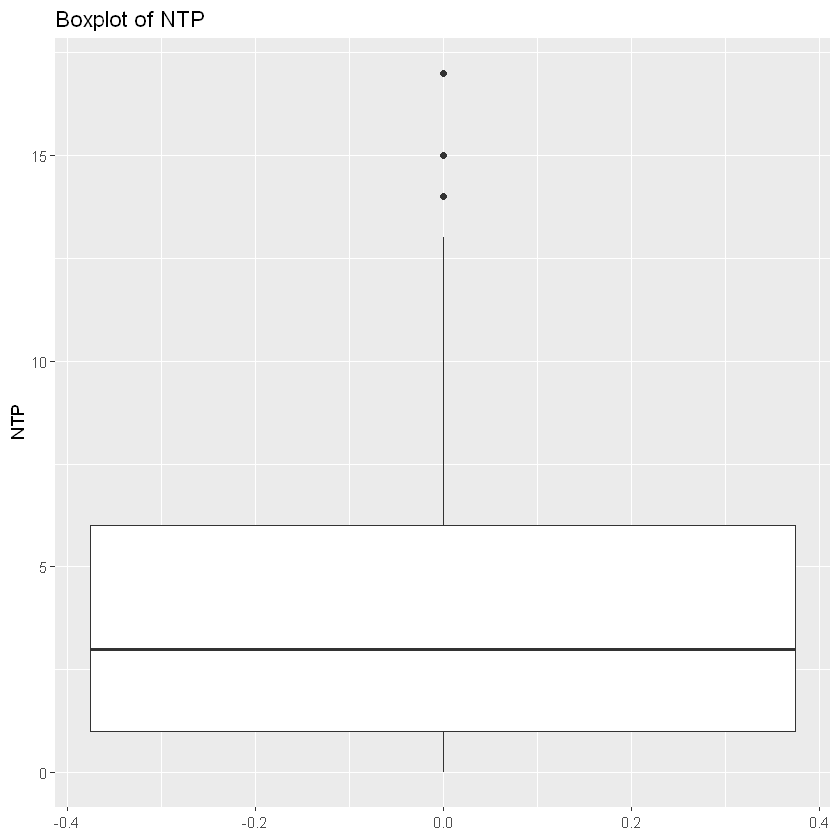

In [96]:
ggplot(data = pima)+
  geom_boxplot(mapping = aes(y= NTP))+
  ggtitle("Boxplot of NTP")

* Now visualize the NTP by age groups.


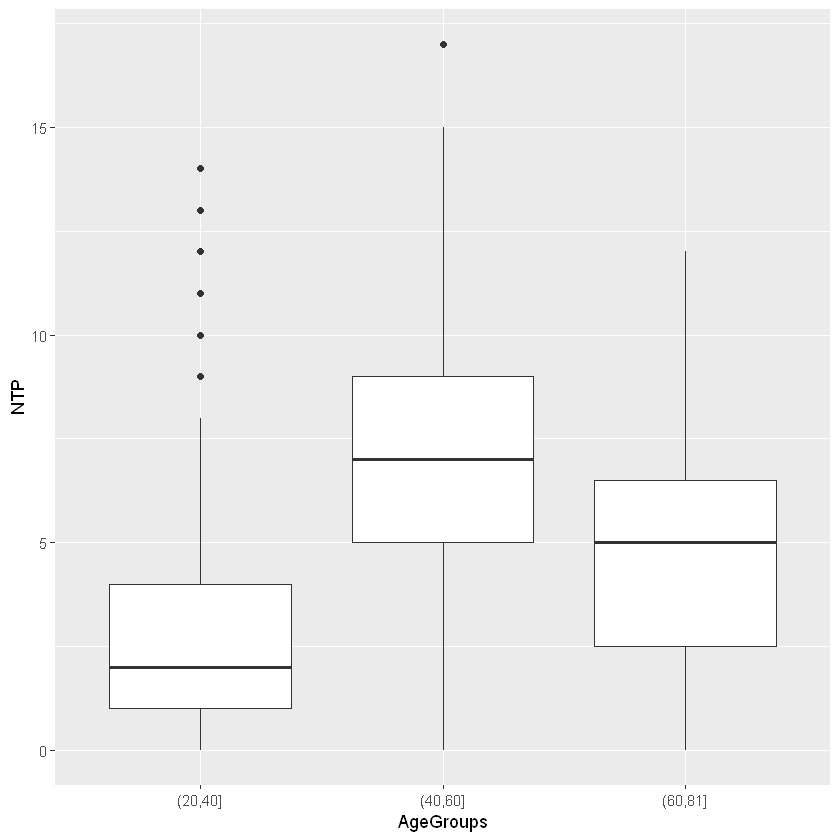

In [97]:
ggplot(data = pima)+
  geom_boxplot(mapping = aes(x= AgeGroups, y= NTP))

* Now visualize the NTP by both age Groups and Diabetes.


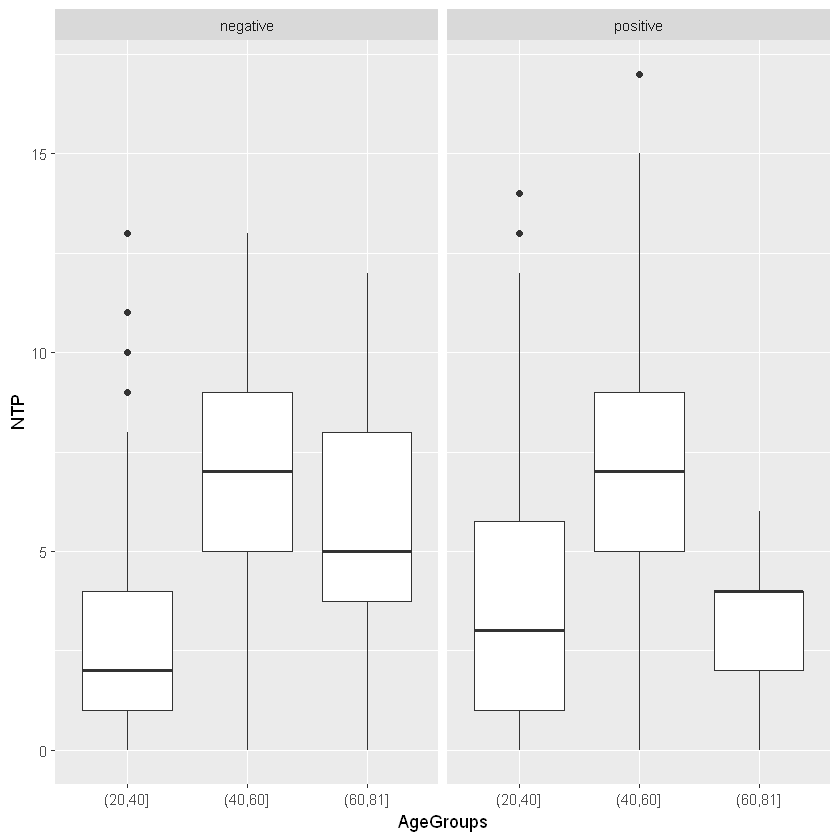

In [98]:
ggplot(data = pima)+
  geom_boxplot(mapping = aes(x= AgeGroups, y= NTP))+
  facet_grid(~ Diabetes)

### Scatterplots

* Draw scatterplots of two variables: PGC and DBP of Pima females.

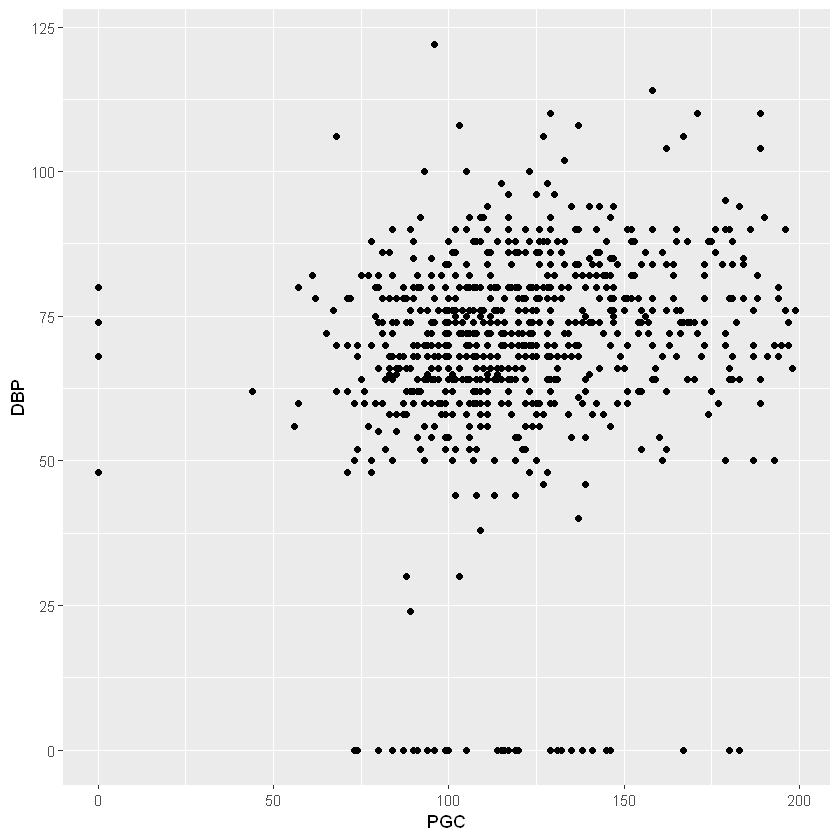

In [99]:
ggplot(pima)+
  geom_point(aes(x=PGC, y=DBP))

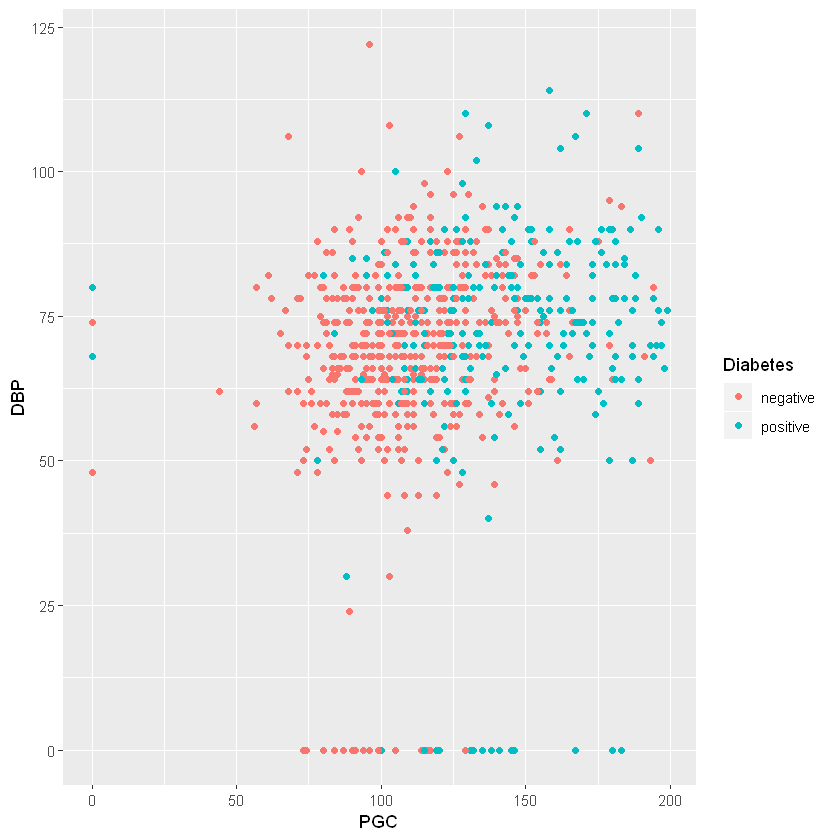

In [100]:
ggplot(pima)+
  geom_point(aes(x=PGC, y=DBP, col = Diabetes))

### Multiple Scatter Plots

* We have to use only numeric variables.
* Also we want to group each scatterplot with diabetes.
* To draw scatterplot we will use `pairs()` function and to color based on a diabetes we will use the `col` argument.


In [101]:
str(pima)

'data.frame':	768 obs. of  10 variables:
 $ NTP      : int  6 1 8 1 0 5 3 10 2 8 ...
 $ PGC      : int  148 85 183 89 137 116 78 115 197 125 ...
 $ DBP      : int  72 66 64 66 40 74 50 0 70 96 ...
 $ TSFT     : int  35 29 0 23 35 0 32 0 45 0 ...
 $ SI       : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI      : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DPF      : num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age      : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Diabetes : Factor w/ 2 levels "negative","positive": 2 1 2 1 2 1 2 1 2 2 ...
 $ AgeGroups: Factor w/ 3 levels "(20,40]","(40,60]",..: 2 1 1 1 1 1 1 1 2 2 ...


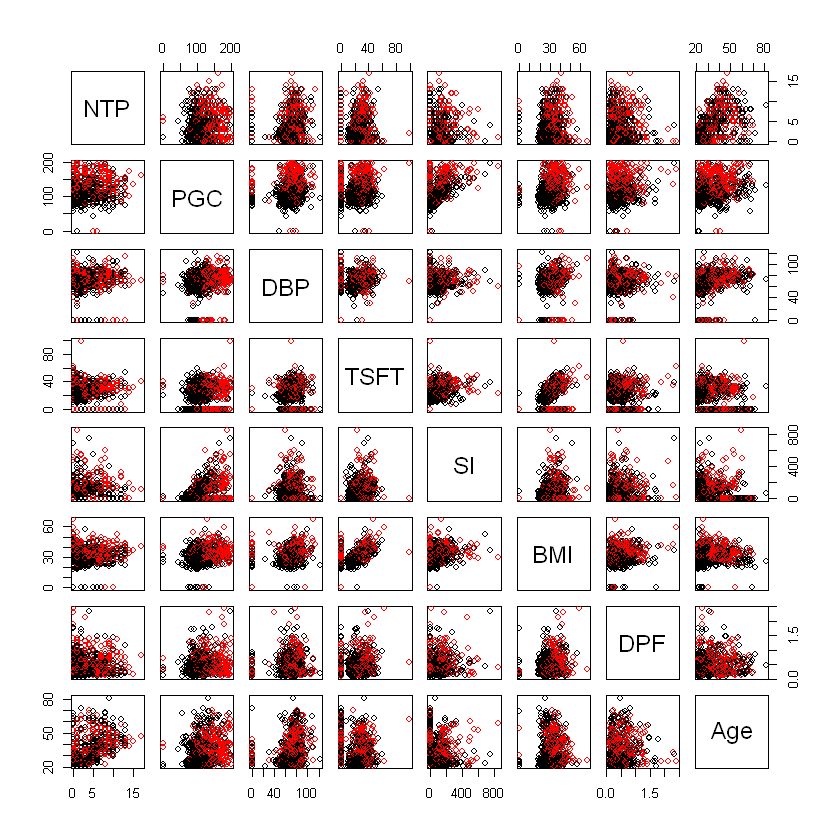

In [102]:
pairs(pima[,1:8], col = as.factor(pima$Diabetes))